In [1]:
import torch
import torch.utils.data
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
import numpy as np
import h5py
from data_utils import get_data
import matplotlib.pyplot as plt
from solver_pytorch import Solver

In [2]:
# Load data from all .mat files, combine them, eliminate EOG signals, shuffle and 
# seperate training data, validation data and testing data.
# Also do mean subtraction on x.

data = get_data('../project_datasets',num_validation=100, num_test=100)
for k in data.keys():
    print('{}: {} '.format(k, data[k].shape))

X_train: (2358, 22, 1000) 
y_train: (2358,) 
X_val: (100, 22, 1000) 
y_val: (100,) 
X_test: (100, 22, 1000) 
y_test: (100,) 


In [3]:
# class flatten to connect to FC layer
class Flatten(nn.Module):
    def forward(self, x):
        N, C, H = x.size() # read in N, C, H
        return x.view(N, -1)

In [4]:
# turn x and y into torch type tensor

dtype = torch.FloatTensor

X_train = Variable(torch.Tensor(data.get('X_train'))).type(dtype)
y_train = Variable(torch.Tensor(data.get('y_train'))).type(torch.IntTensor)
X_val = Variable(torch.Tensor(data.get('X_val'))).type(dtype)
y_val = Variable(torch.Tensor(data.get('y_val'))).type(torch.IntTensor)
X_test = Variable(torch.Tensor(data.get('X_test'))).type(dtype)
y_test = Variable(torch.Tensor(data.get('y_test'))).type(torch.IntTensor)

In [5]:
# train a 1D convolutional neural network
# optimize hyper parameters
best_model = None
parameters =[] # a list of dictionaries
parameter = {} # a dictionary
best_params = {} # a dictionary
best_val_acc = 0.0

# hyper parameters in model
filter_nums = [30, 20, 10]

filter_sizes = [28, 20, 12, 4]
pool_sizes = [4,2]

# hyper parameters in solver
batch_sizes = [50, 100, 200]
lrs = [1e-3, 5e-4, 1e-4]

for filter_num in filter_nums:
    for filter_size in filter_sizes:
        for pool_size in pool_sizes:
            linear_size = int((X_test.shape[2]-filter_size)/4)+1
            linear_size = int((linear_size-pool_size)/pool_size)+1
            linear_size *= filter_num
            for batch_size in batch_sizes:
                for lr in lrs:
                    model = nn.Sequential(
                        nn.Conv1d(22, filter_num, kernel_size=filter_size, stride=4),
                        nn.ReLU(inplace=True),
                        nn.Dropout(p=0.5),
                        nn.BatchNorm1d(num_features=filter_num),
                        nn.MaxPool1d(kernel_size=pool_size, stride=pool_size),
                        Flatten(),
                        nn.Linear(linear_size, 20),
                        nn.ReLU(inplace=True),
                        nn.Linear(20, 4)
                    )

                    model.type(dtype)

                    solver = Solver(model, data,
                                    lr = lr, batch_size=batch_size,
                                    verbose=True, print_every=50)

                    solver.train()

                    # save training results and parameters of neural networks
                    parameter['filter_num'] = filter_num
                    parameter['filter_size'] = filter_size
                    parameter['pool_size'] = pool_size
                    parameter['batch_size'] = batch_size
                    parameter['lr'] = lr
                    parameters.append(parameter)

                    print('Accuracy on the validation set: ', solver.best_val_acc)
                    print('parameters of the best model:')
                    print(parameter)

                    if solver.best_val_acc > best_val_acc:
                        best_val_acc = solver.best_val_acc
                        best_model = model
                        best_solver = solver
                        best_params = parameter
                        



(Iteration 1 / 2350) loss: 1.379445
(Epoch 0 / 50) train acc: 0.259118; val_acc: 0.210000
(Epoch 1 / 50) train acc: 0.416031; val_acc: 0.360000
(Iteration 51 / 2350) loss: 1.200719
(Epoch 2 / 50) train acc: 0.513147; val_acc: 0.460000
(Iteration 101 / 2350) loss: 1.186526
(Epoch 3 / 50) train acc: 0.588634; val_acc: 0.480000
(Iteration 151 / 2350) loss: 0.958077
(Epoch 4 / 50) train acc: 0.641221; val_acc: 0.560000
(Iteration 201 / 2350) loss: 0.941272
(Epoch 5 / 50) train acc: 0.685751; val_acc: 0.470000
(Iteration 251 / 2350) loss: 0.882587
(Epoch 6 / 50) train acc: 0.732824; val_acc: 0.560000
(Iteration 301 / 2350) loss: 0.640068
(Epoch 7 / 50) train acc: 0.765903; val_acc: 0.600000
(Iteration 351 / 2350) loss: 0.784138
(Epoch 8 / 50) train acc: 0.777354; val_acc: 0.550000
(Iteration 401 / 2350) loss: 0.568240
(Epoch 9 / 50) train acc: 0.796862; val_acc: 0.530000
(Iteration 451 / 2350) loss: 0.379905
(Epoch 10 / 50) train acc: 0.825700; val_acc: 0.550000
(Iteration 501 / 2350) loss:

(Epoch 38 / 50) train acc: 0.943596; val_acc: 0.670000
(Iteration 1801 / 2350) loss: 0.236595
(Epoch 39 / 50) train acc: 0.944869; val_acc: 0.610000
(Iteration 1851 / 2350) loss: 0.092335
(Epoch 40 / 50) train acc: 0.951230; val_acc: 0.620000
(Iteration 1901 / 2350) loss: 0.101510
(Epoch 41 / 50) train acc: 0.955895; val_acc: 0.560000
(Iteration 1951 / 2350) loss: 0.059503
(Epoch 42 / 50) train acc: 0.952502; val_acc: 0.650000
(Iteration 2001 / 2350) loss: 0.199851
(Epoch 43 / 50) train acc: 0.950806; val_acc: 0.670000
(Iteration 2051 / 2350) loss: 0.145398
(Epoch 44 / 50) train acc: 0.963104; val_acc: 0.630000
(Iteration 2101 / 2350) loss: 0.153937
(Epoch 45 / 50) train acc: 0.956319; val_acc: 0.640000
(Iteration 2151 / 2350) loss: 0.107878
(Epoch 46 / 50) train acc: 0.965649; val_acc: 0.580000
(Iteration 2201 / 2350) loss: 0.097893
(Epoch 47 / 50) train acc: 0.955895; val_acc: 0.610000
(Iteration 2251 / 2350) loss: 0.068197
(Epoch 48 / 50) train acc: 0.965225; val_acc: 0.580000
(Iter

(Epoch 30 / 50) train acc: 0.924088; val_acc: 0.630000
(Iteration 701 / 1150) loss: 0.254254
(Epoch 31 / 50) train acc: 0.927905; val_acc: 0.660000
(Epoch 32 / 50) train acc: 0.938083; val_acc: 0.640000
(Iteration 751 / 1150) loss: 0.150138
(Epoch 33 / 50) train acc: 0.933418; val_acc: 0.640000
(Epoch 34 / 50) train acc: 0.940204; val_acc: 0.680000
(Iteration 801 / 1150) loss: 0.215717
(Epoch 35 / 50) train acc: 0.941476; val_acc: 0.640000
(Epoch 36 / 50) train acc: 0.946565; val_acc: 0.630000
(Iteration 851 / 1150) loss: 0.156469
(Epoch 37 / 50) train acc: 0.949534; val_acc: 0.640000
(Epoch 38 / 50) train acc: 0.956319; val_acc: 0.630000
(Epoch 39 / 50) train acc: 0.953350; val_acc: 0.630000
(Iteration 901 / 1150) loss: 0.067629
(Epoch 40 / 50) train acc: 0.949109; val_acc: 0.630000
(Epoch 41 / 50) train acc: 0.958439; val_acc: 0.660000
(Iteration 951 / 1150) loss: 0.081447
(Epoch 42 / 50) train acc: 0.956319; val_acc: 0.640000
(Epoch 43 / 50) train acc: 0.934266; val_acc: 0.580000
(I

(Epoch 38 / 50) train acc: 0.802375; val_acc: 0.570000
(Epoch 39 / 50) train acc: 0.802799; val_acc: 0.600000
(Iteration 901 / 1150) loss: 0.669851
(Epoch 40 / 50) train acc: 0.804495; val_acc: 0.630000
(Epoch 41 / 50) train acc: 0.809160; val_acc: 0.630000
(Iteration 951 / 1150) loss: 0.555530
(Epoch 42 / 50) train acc: 0.802799; val_acc: 0.700000
(Epoch 43 / 50) train acc: 0.824852; val_acc: 0.650000
(Iteration 1001 / 1150) loss: 0.569299
(Epoch 44 / 50) train acc: 0.821883; val_acc: 0.620000
(Epoch 45 / 50) train acc: 0.821883; val_acc: 0.650000
(Iteration 1051 / 1150) loss: 0.509081
(Epoch 46 / 50) train acc: 0.827820; val_acc: 0.660000
(Epoch 47 / 50) train acc: 0.829092; val_acc: 0.620000
(Iteration 1101 / 1150) loss: 0.492817
(Epoch 48 / 50) train acc: 0.821883; val_acc: 0.620000
(Epoch 49 / 50) train acc: 0.834182; val_acc: 0.670000
(Epoch 50 / 50) train acc: 0.835878; val_acc: 0.640000
Accuracy on the validation set:  0.7
parameters of the best model:
{'filter_num': 30, 'filte

(Epoch 7 / 50) train acc: 0.407549; val_acc: 0.360000
(Epoch 8 / 50) train acc: 0.435115; val_acc: 0.340000
(Epoch 9 / 50) train acc: 0.435115; val_acc: 0.380000
(Iteration 101 / 550) loss: 1.273300
(Epoch 10 / 50) train acc: 0.430874; val_acc: 0.310000
(Epoch 11 / 50) train acc: 0.454623; val_acc: 0.370000
(Epoch 12 / 50) train acc: 0.474555; val_acc: 0.340000
(Epoch 13 / 50) train acc: 0.490246; val_acc: 0.320000
(Iteration 151 / 550) loss: 1.220123
(Epoch 14 / 50) train acc: 0.504241; val_acc: 0.430000
(Epoch 15 / 50) train acc: 0.526718; val_acc: 0.460000
(Epoch 16 / 50) train acc: 0.534775; val_acc: 0.400000
(Epoch 17 / 50) train acc: 0.540288; val_acc: 0.390000
(Epoch 18 / 50) train acc: 0.553859; val_acc: 0.440000
(Iteration 201 / 550) loss: 1.128305
(Epoch 19 / 50) train acc: 0.567854; val_acc: 0.420000
(Epoch 20 / 50) train acc: 0.581425; val_acc: 0.430000
(Epoch 21 / 50) train acc: 0.596692; val_acc: 0.520000
(Epoch 22 / 50) train acc: 0.604326; val_acc: 0.420000
(Iteration 2

(Epoch 6 / 50) train acc: 0.718405; val_acc: 0.550000
(Iteration 301 / 2350) loss: 0.666160
(Epoch 7 / 50) train acc: 0.745547; val_acc: 0.590000
(Iteration 351 / 2350) loss: 0.585463
(Epoch 8 / 50) train acc: 0.782867; val_acc: 0.550000
(Iteration 401 / 2350) loss: 0.616255
(Epoch 9 / 50) train acc: 0.793045; val_acc: 0.570000
(Iteration 451 / 2350) loss: 0.434510
(Epoch 10 / 50) train acc: 0.797286; val_acc: 0.580000
(Iteration 501 / 2350) loss: 0.517322
(Epoch 11 / 50) train acc: 0.810433; val_acc: 0.600000
(Iteration 551 / 2350) loss: 0.411678
(Epoch 12 / 50) train acc: 0.826548; val_acc: 0.620000
(Iteration 601 / 2350) loss: 0.581127
(Epoch 13 / 50) train acc: 0.845632; val_acc: 0.590000
(Iteration 651 / 2350) loss: 0.440862
(Epoch 14 / 50) train acc: 0.867684; val_acc: 0.590000
(Iteration 701 / 2350) loss: 0.273712
(Epoch 15 / 50) train acc: 0.865988; val_acc: 0.560000
(Iteration 751 / 2350) loss: 0.495687
(Epoch 16 / 50) train acc: 0.884224; val_acc: 0.620000
(Epoch 17 / 50) tra

(Iteration 2051 / 2350) loss: 0.311094
(Epoch 44 / 50) train acc: 0.902884; val_acc: 0.560000
(Iteration 2101 / 2350) loss: 0.524009
(Epoch 45 / 50) train acc: 0.914758; val_acc: 0.550000
(Iteration 2151 / 2350) loss: 0.301690
(Epoch 46 / 50) train acc: 0.910517; val_acc: 0.560000
(Iteration 2201 / 2350) loss: 0.248756
(Epoch 47 / 50) train acc: 0.910093; val_acc: 0.610000
(Iteration 2251 / 2350) loss: 0.269131
(Epoch 48 / 50) train acc: 0.912638; val_acc: 0.560000
(Iteration 2301 / 2350) loss: 0.350200
(Epoch 49 / 50) train acc: 0.922392; val_acc: 0.580000
(Epoch 50 / 50) train acc: 0.912638; val_acc: 0.540000
Accuracy on the validation set:  0.64
parameters of the best model:
{'filter_num': 30, 'filter_size': 28, 'pool_size': 2, 'batch_size': 50, 'lr': 0.0001}
(Iteration 1 / 1150) loss: 1.422617
(Epoch 0 / 50) train acc: 0.259542; val_acc: 0.170000
(Epoch 1 / 50) train acc: 0.423664; val_acc: 0.380000
(Epoch 2 / 50) train acc: 0.522477; val_acc: 0.370000
(Iteration 51 / 1150) loss: 1

(Epoch 50 / 50) train acc: 0.960984; val_acc: 0.640000
Accuracy on the validation set:  0.69
parameters of the best model:
{'filter_num': 30, 'filter_size': 28, 'pool_size': 2, 'batch_size': 100, 'lr': 0.0005}
(Iteration 1 / 1150) loss: 1.404293
(Epoch 0 / 50) train acc: 0.253605; val_acc: 0.190000
(Epoch 1 / 50) train acc: 0.305344; val_acc: 0.260000
(Epoch 2 / 50) train acc: 0.358355; val_acc: 0.250000
(Iteration 51 / 1150) loss: 1.346089
(Epoch 3 / 50) train acc: 0.402460; val_acc: 0.310000
(Epoch 4 / 50) train acc: 0.434690; val_acc: 0.320000
(Iteration 101 / 1150) loss: 1.302223
(Epoch 5 / 50) train acc: 0.459288; val_acc: 0.340000
(Epoch 6 / 50) train acc: 0.470738; val_acc: 0.380000
(Iteration 151 / 1150) loss: 1.254977
(Epoch 7 / 50) train acc: 0.498728; val_acc: 0.300000
(Epoch 8 / 50) train acc: 0.506785; val_acc: 0.390000
(Iteration 201 / 1150) loss: 1.169776
(Epoch 9 / 50) train acc: 0.553011; val_acc: 0.410000
(Epoch 10 / 50) train acc: 0.569126; val_acc: 0.440000
(Iterati

(Epoch 13 / 50) train acc: 0.768448; val_acc: 0.520000
(Iteration 151 / 550) loss: 0.696012
(Epoch 14 / 50) train acc: 0.780746; val_acc: 0.480000
(Epoch 15 / 50) train acc: 0.804071; val_acc: 0.590000
(Epoch 16 / 50) train acc: 0.815946; val_acc: 0.630000
(Epoch 17 / 50) train acc: 0.820611; val_acc: 0.570000
(Epoch 18 / 50) train acc: 0.829517; val_acc: 0.570000
(Iteration 201 / 550) loss: 0.513351
(Epoch 19 / 50) train acc: 0.830789; val_acc: 0.550000
(Epoch 20 / 50) train acc: 0.835454; val_acc: 0.560000
(Epoch 21 / 50) train acc: 0.846480; val_acc: 0.580000
(Epoch 22 / 50) train acc: 0.850721; val_acc: 0.620000
(Iteration 251 / 550) loss: 0.360549
(Epoch 23 / 50) train acc: 0.863020; val_acc: 0.610000
(Epoch 24 / 50) train acc: 0.870229; val_acc: 0.550000
(Epoch 25 / 50) train acc: 0.882952; val_acc: 0.550000
(Epoch 26 / 50) train acc: 0.874046; val_acc: 0.530000
(Epoch 27 / 50) train acc: 0.877863; val_acc: 0.570000
(Iteration 301 / 550) loss: 0.331468
(Epoch 28 / 50) train acc: 

(Iteration 1201 / 2350) loss: 0.249888
(Epoch 26 / 50) train acc: 0.936387; val_acc: 0.580000
(Iteration 1251 / 2350) loss: 0.091844
(Epoch 27 / 50) train acc: 0.935115; val_acc: 0.610000
(Iteration 1301 / 2350) loss: 0.155746
(Epoch 28 / 50) train acc: 0.952502; val_acc: 0.680000
(Iteration 1351 / 2350) loss: 0.107300
(Epoch 29 / 50) train acc: 0.946141; val_acc: 0.640000
(Iteration 1401 / 2350) loss: 0.155406
(Epoch 30 / 50) train acc: 0.941476; val_acc: 0.630000
(Iteration 1451 / 2350) loss: 0.164305
(Epoch 31 / 50) train acc: 0.944020; val_acc: 0.680000
(Iteration 1501 / 2350) loss: 0.125441
(Epoch 32 / 50) train acc: 0.951230; val_acc: 0.650000
(Iteration 1551 / 2350) loss: 0.156117
(Epoch 33 / 50) train acc: 0.963953; val_acc: 0.630000
(Epoch 34 / 50) train acc: 0.962256; val_acc: 0.610000
(Iteration 1601 / 2350) loss: 0.153027
(Epoch 35 / 50) train acc: 0.960560; val_acc: 0.610000
(Iteration 1651 / 2350) loss: 0.104226
(Epoch 36 / 50) train acc: 0.957591; val_acc: 0.590000
(Iter

(Epoch 11 / 50) train acc: 0.626378; val_acc: 0.520000
(Iteration 551 / 2350) loss: 0.986719
(Epoch 12 / 50) train acc: 0.628923; val_acc: 0.530000
(Iteration 601 / 2350) loss: 1.053508
(Epoch 13 / 50) train acc: 0.640373; val_acc: 0.580000
(Iteration 651 / 2350) loss: 0.792128
(Epoch 14 / 50) train acc: 0.664970; val_acc: 0.520000
(Iteration 701 / 2350) loss: 0.888549
(Epoch 15 / 50) train acc: 0.667939; val_acc: 0.570000
(Iteration 751 / 2350) loss: 0.892416
(Epoch 16 / 50) train acc: 0.670483; val_acc: 0.550000
(Epoch 17 / 50) train acc: 0.682358; val_acc: 0.570000
(Iteration 801 / 2350) loss: 0.874998
(Epoch 18 / 50) train acc: 0.701018; val_acc: 0.590000
(Iteration 851 / 2350) loss: 0.883863
(Epoch 19 / 50) train acc: 0.703138; val_acc: 0.580000
(Iteration 901 / 2350) loss: 0.742571
(Epoch 20 / 50) train acc: 0.706531; val_acc: 0.600000
(Iteration 951 / 2350) loss: 0.732685
(Epoch 21 / 50) train acc: 0.732400; val_acc: 0.550000
(Iteration 1001 / 2350) loss: 0.763232
(Epoch 22 / 50

(Iteration 201 / 1150) loss: 0.920074
(Epoch 9 / 50) train acc: 0.691688; val_acc: 0.450000
(Epoch 10 / 50) train acc: 0.727735; val_acc: 0.570000
(Iteration 251 / 1150) loss: 0.702115
(Epoch 11 / 50) train acc: 0.740034; val_acc: 0.540000
(Epoch 12 / 50) train acc: 0.759542; val_acc: 0.580000
(Epoch 13 / 50) train acc: 0.756573; val_acc: 0.600000
(Iteration 301 / 1150) loss: 0.621657
(Epoch 14 / 50) train acc: 0.787956; val_acc: 0.600000
(Epoch 15 / 50) train acc: 0.774809; val_acc: 0.490000
(Iteration 351 / 1150) loss: 0.526074
(Epoch 16 / 50) train acc: 0.794741; val_acc: 0.600000
(Epoch 17 / 50) train acc: 0.808312; val_acc: 0.600000
(Iteration 401 / 1150) loss: 0.660381
(Epoch 18 / 50) train acc: 0.812129; val_acc: 0.600000
(Epoch 19 / 50) train acc: 0.819763; val_acc: 0.580000
(Iteration 451 / 1150) loss: 0.513751
(Epoch 20 / 50) train acc: 0.837574; val_acc: 0.600000
(Epoch 21 / 50) train acc: 0.832061; val_acc: 0.600000
(Iteration 501 / 1150) loss: 0.381852
(Epoch 22 / 50) trai

(Iteration 201 / 550) loss: 0.501909
(Epoch 19 / 50) train acc: 0.827820; val_acc: 0.680000
(Epoch 20 / 50) train acc: 0.832909; val_acc: 0.680000
(Epoch 21 / 50) train acc: 0.830365; val_acc: 0.670000
(Epoch 22 / 50) train acc: 0.852841; val_acc: 0.700000
(Iteration 251 / 550) loss: 0.425794
(Epoch 23 / 50) train acc: 0.847328; val_acc: 0.730000
(Epoch 24 / 50) train acc: 0.864292; val_acc: 0.640000
(Epoch 25 / 50) train acc: 0.868533; val_acc: 0.680000
(Epoch 26 / 50) train acc: 0.865140; val_acc: 0.710000
(Epoch 27 / 50) train acc: 0.868957; val_acc: 0.600000
(Iteration 301 / 550) loss: 0.477664
(Epoch 28 / 50) train acc: 0.866836; val_acc: 0.660000
(Epoch 29 / 50) train acc: 0.871925; val_acc: 0.660000
(Epoch 30 / 50) train acc: 0.874894; val_acc: 0.670000
(Epoch 31 / 50) train acc: 0.884648; val_acc: 0.670000
(Iteration 351 / 550) loss: 0.314382
(Epoch 32 / 50) train acc: 0.889737; val_acc: 0.630000
(Epoch 33 / 50) train acc: 0.901187; val_acc: 0.620000
(Epoch 34 / 50) train acc: 

(Epoch 42 / 50) train acc: 0.710772; val_acc: 0.620000
(Epoch 43 / 50) train acc: 0.709075; val_acc: 0.580000
(Epoch 44 / 50) train acc: 0.710348; val_acc: 0.580000
(Epoch 45 / 50) train acc: 0.723919; val_acc: 0.590000
(Iteration 501 / 550) loss: 0.833210
(Epoch 46 / 50) train acc: 0.727735; val_acc: 0.630000
(Epoch 47 / 50) train acc: 0.723919; val_acc: 0.590000
(Epoch 48 / 50) train acc: 0.732400; val_acc: 0.610000
(Epoch 49 / 50) train acc: 0.748092; val_acc: 0.540000
(Epoch 50 / 50) train acc: 0.742578; val_acc: 0.590000
Accuracy on the validation set:  0.63
parameters of the best model:
{'filter_num': 30, 'filter_size': 20, 'pool_size': 4, 'batch_size': 200, 'lr': 0.0001}
(Iteration 1 / 2350) loss: 1.453002
(Epoch 0 / 50) train acc: 0.265479; val_acc: 0.290000
(Epoch 1 / 50) train acc: 0.463953; val_acc: 0.320000
(Iteration 51 / 2350) loss: 1.263345
(Epoch 2 / 50) train acc: 0.580577; val_acc: 0.390000
(Iteration 101 / 2350) loss: 1.115649
(Epoch 3 / 50) train acc: 0.664122; val_

(Epoch 30 / 50) train acc: 0.938083; val_acc: 0.640000
(Iteration 1451 / 2350) loss: 0.154869
(Epoch 31 / 50) train acc: 0.935539; val_acc: 0.650000
(Iteration 1501 / 2350) loss: 0.121666
(Epoch 32 / 50) train acc: 0.945717; val_acc: 0.590000
(Iteration 1551 / 2350) loss: 0.557244
(Epoch 33 / 50) train acc: 0.942748; val_acc: 0.550000
(Epoch 34 / 50) train acc: 0.949109; val_acc: 0.580000
(Iteration 1601 / 2350) loss: 0.086304
(Epoch 35 / 50) train acc: 0.944444; val_acc: 0.630000
(Iteration 1651 / 2350) loss: 0.205495
(Epoch 36 / 50) train acc: 0.953350; val_acc: 0.640000
(Iteration 1701 / 2350) loss: 0.199745
(Epoch 37 / 50) train acc: 0.954198; val_acc: 0.610000
(Iteration 1751 / 2350) loss: 0.207609
(Epoch 38 / 50) train acc: 0.948685; val_acc: 0.600000
(Iteration 1801 / 2350) loss: 0.123889
(Epoch 39 / 50) train acc: 0.953774; val_acc: 0.640000
(Iteration 1851 / 2350) loss: 0.153438
(Epoch 40 / 50) train acc: 0.950382; val_acc: 0.580000
(Iteration 1901 / 2350) loss: 0.081731
(Epoc

(Iteration 451 / 1150) loss: 0.201202
(Epoch 20 / 50) train acc: 0.933418; val_acc: 0.540000
(Epoch 21 / 50) train acc: 0.949109; val_acc: 0.620000
(Iteration 501 / 1150) loss: 0.173515
(Epoch 22 / 50) train acc: 0.959288; val_acc: 0.600000
(Epoch 23 / 50) train acc: 0.960136; val_acc: 0.580000
(Iteration 551 / 1150) loss: 0.181148
(Epoch 24 / 50) train acc: 0.960136; val_acc: 0.520000
(Epoch 25 / 50) train acc: 0.967345; val_acc: 0.520000
(Epoch 26 / 50) train acc: 0.966073; val_acc: 0.560000
(Iteration 601 / 1150) loss: 0.104465
(Epoch 27 / 50) train acc: 0.968193; val_acc: 0.480000
(Epoch 28 / 50) train acc: 0.965649; val_acc: 0.580000
(Iteration 651 / 1150) loss: 0.059498
(Epoch 29 / 50) train acc: 0.966497; val_acc: 0.570000
(Epoch 30 / 50) train acc: 0.972858; val_acc: 0.570000
(Iteration 701 / 1150) loss: 0.136534
(Epoch 31 / 50) train acc: 0.975403; val_acc: 0.630000
(Epoch 32 / 50) train acc: 0.974555; val_acc: 0.540000
(Iteration 751 / 1150) loss: 0.055623
(Epoch 33 / 50) tra

(Epoch 28 / 50) train acc: 0.768872; val_acc: 0.570000
(Iteration 651 / 1150) loss: 0.655501
(Epoch 29 / 50) train acc: 0.781170; val_acc: 0.630000
(Epoch 30 / 50) train acc: 0.779898; val_acc: 0.510000
(Iteration 701 / 1150) loss: 0.670588
(Epoch 31 / 50) train acc: 0.792197; val_acc: 0.530000
(Epoch 32 / 50) train acc: 0.798134; val_acc: 0.620000
(Iteration 751 / 1150) loss: 0.619842
(Epoch 33 / 50) train acc: 0.804071; val_acc: 0.670000
(Epoch 34 / 50) train acc: 0.811705; val_acc: 0.630000
(Iteration 801 / 1150) loss: 0.603866
(Epoch 35 / 50) train acc: 0.801951; val_acc: 0.530000
(Epoch 36 / 50) train acc: 0.818066; val_acc: 0.530000
(Iteration 851 / 1150) loss: 0.588450
(Epoch 37 / 50) train acc: 0.824003; val_acc: 0.600000
(Epoch 38 / 50) train acc: 0.813401; val_acc: 0.570000
(Epoch 39 / 50) train acc: 0.821459; val_acc: 0.570000
(Iteration 901 / 1150) loss: 0.640734
(Epoch 40 / 50) train acc: 0.823579; val_acc: 0.580000
(Epoch 41 / 50) train acc: 0.822307; val_acc: 0.610000
(I

(Epoch 49 / 50) train acc: 0.930874; val_acc: 0.600000
(Epoch 50 / 50) train acc: 0.943172; val_acc: 0.620000
Accuracy on the validation set:  0.69
parameters of the best model:
{'filter_num': 30, 'filter_size': 20, 'pool_size': 2, 'batch_size': 200, 'lr': 0.0005}
(Iteration 1 / 550) loss: 1.422658
(Epoch 0 / 50) train acc: 0.248092; val_acc: 0.280000
(Epoch 1 / 50) train acc: 0.274809; val_acc: 0.230000
(Epoch 2 / 50) train acc: 0.293893; val_acc: 0.290000
(Epoch 3 / 50) train acc: 0.333757; val_acc: 0.330000
(Epoch 4 / 50) train acc: 0.349449; val_acc: 0.330000
(Iteration 51 / 550) loss: 1.334591
(Epoch 5 / 50) train acc: 0.376166; val_acc: 0.280000
(Epoch 6 / 50) train acc: 0.396098; val_acc: 0.280000
(Epoch 7 / 50) train acc: 0.405852; val_acc: 0.300000
(Epoch 8 / 50) train acc: 0.427057; val_acc: 0.330000
(Epoch 9 / 50) train acc: 0.444444; val_acc: 0.350000
(Iteration 101 / 550) loss: 1.237683
(Epoch 10 / 50) train acc: 0.461408; val_acc: 0.330000
(Epoch 11 / 50) train acc: 0.469

(Iteration 1 / 2350) loss: 1.414029
(Epoch 0 / 50) train acc: 0.251060; val_acc: 0.280000
(Epoch 1 / 50) train acc: 0.414334; val_acc: 0.350000
(Iteration 51 / 2350) loss: 1.111057
(Epoch 2 / 50) train acc: 0.480916; val_acc: 0.380000
(Iteration 101 / 2350) loss: 1.264015
(Epoch 3 / 50) train acc: 0.576336; val_acc: 0.390000
(Iteration 151 / 2350) loss: 1.060931
(Epoch 4 / 50) train acc: 0.612383; val_acc: 0.460000
(Iteration 201 / 2350) loss: 0.945011
(Epoch 5 / 50) train acc: 0.669211; val_acc: 0.570000
(Iteration 251 / 2350) loss: 0.707965
(Epoch 6 / 50) train acc: 0.681934; val_acc: 0.510000
(Iteration 301 / 2350) loss: 0.674246
(Epoch 7 / 50) train acc: 0.715437; val_acc: 0.520000
(Iteration 351 / 2350) loss: 0.852775
(Epoch 8 / 50) train acc: 0.695929; val_acc: 0.500000
(Iteration 401 / 2350) loss: 0.604611
(Epoch 9 / 50) train acc: 0.734097; val_acc: 0.570000
(Iteration 451 / 2350) loss: 0.703347
(Epoch 10 / 50) train acc: 0.761238; val_acc: 0.610000
(Iteration 501 / 2350) loss:

(Epoch 38 / 50) train acc: 0.795165; val_acc: 0.630000
(Iteration 1801 / 2350) loss: 0.527488
(Epoch 39 / 50) train acc: 0.809584; val_acc: 0.640000
(Iteration 1851 / 2350) loss: 0.532153
(Epoch 40 / 50) train acc: 0.809160; val_acc: 0.630000
(Iteration 1901 / 2350) loss: 0.427628
(Epoch 41 / 50) train acc: 0.822307; val_acc: 0.590000
(Iteration 1951 / 2350) loss: 0.492312
(Epoch 42 / 50) train acc: 0.813401; val_acc: 0.630000
(Iteration 2001 / 2350) loss: 0.428897
(Epoch 43 / 50) train acc: 0.819763; val_acc: 0.600000
(Iteration 2051 / 2350) loss: 0.513759
(Epoch 44 / 50) train acc: 0.816370; val_acc: 0.580000
(Iteration 2101 / 2350) loss: 0.439226
(Epoch 45 / 50) train acc: 0.817218; val_acc: 0.640000
(Iteration 2151 / 2350) loss: 0.463145
(Epoch 46 / 50) train acc: 0.823155; val_acc: 0.620000
(Iteration 2201 / 2350) loss: 0.426488
(Epoch 47 / 50) train acc: 0.832485; val_acc: 0.560000
(Iteration 2251 / 2350) loss: 0.562703
(Epoch 48 / 50) train acc: 0.832061; val_acc: 0.620000
(Iter

(Epoch 43 / 50) train acc: 0.917303; val_acc: 0.650000
(Iteration 1001 / 1150) loss: 0.190457
(Epoch 44 / 50) train acc: 0.902884; val_acc: 0.580000
(Epoch 45 / 50) train acc: 0.919423; val_acc: 0.580000
(Iteration 1051 / 1150) loss: 0.304761
(Epoch 46 / 50) train acc: 0.933418; val_acc: 0.580000
(Epoch 47 / 50) train acc: 0.917727; val_acc: 0.620000
(Iteration 1101 / 1150) loss: 0.232613
(Epoch 48 / 50) train acc: 0.916879; val_acc: 0.640000
(Epoch 49 / 50) train acc: 0.926633; val_acc: 0.600000
(Epoch 50 / 50) train acc: 0.929177; val_acc: 0.640000
Accuracy on the validation set:  0.67
parameters of the best model:
{'filter_num': 30, 'filter_size': 12, 'pool_size': 4, 'batch_size': 100, 'lr': 0.0005}
(Iteration 1 / 1150) loss: 1.374519
(Epoch 0 / 50) train acc: 0.266327; val_acc: 0.310000
(Epoch 1 / 50) train acc: 0.304495; val_acc: 0.200000
(Epoch 2 / 50) train acc: 0.331213; val_acc: 0.250000
(Iteration 51 / 1150) loss: 1.341984
(Epoch 3 / 50) train acc: 0.360475; val_acc: 0.290000

(Iteration 51 / 550) loss: 1.180103
(Epoch 5 / 50) train acc: 0.478372; val_acc: 0.400000
(Epoch 6 / 50) train acc: 0.532655; val_acc: 0.320000
(Epoch 7 / 50) train acc: 0.560221; val_acc: 0.380000
(Epoch 8 / 50) train acc: 0.605598; val_acc: 0.450000
(Epoch 9 / 50) train acc: 0.620017; val_acc: 0.450000
(Iteration 101 / 550) loss: 0.965915
(Epoch 10 / 50) train acc: 0.634012; val_acc: 0.420000
(Epoch 11 / 50) train acc: 0.664970; val_acc: 0.490000
(Epoch 12 / 50) train acc: 0.689143; val_acc: 0.500000
(Epoch 13 / 50) train acc: 0.693384; val_acc: 0.510000
(Iteration 151 / 550) loss: 0.778001
(Epoch 14 / 50) train acc: 0.689992; val_acc: 0.530000
(Epoch 15 / 50) train acc: 0.716709; val_acc: 0.540000
(Epoch 16 / 50) train acc: 0.731976; val_acc: 0.570000
(Epoch 17 / 50) train acc: 0.752757; val_acc: 0.580000
(Epoch 18 / 50) train acc: 0.748516; val_acc: 0.550000
(Iteration 201 / 550) loss: 0.736534
(Epoch 19 / 50) train acc: 0.748092; val_acc: 0.620000
(Epoch 20 / 50) train acc: 0.7680

(Epoch 20 / 50) train acc: 0.967345; val_acc: 0.580000
(Iteration 951 / 2350) loss: 0.054517
(Epoch 21 / 50) train acc: 0.968617; val_acc: 0.530000
(Iteration 1001 / 2350) loss: 0.170168
(Epoch 22 / 50) train acc: 0.966073; val_acc: 0.560000
(Iteration 1051 / 2350) loss: 0.162811
(Epoch 23 / 50) train acc: 0.965225; val_acc: 0.590000
(Iteration 1101 / 2350) loss: 0.026598
(Epoch 24 / 50) train acc: 0.972858; val_acc: 0.570000
(Iteration 1151 / 2350) loss: 0.064144
(Epoch 25 / 50) train acc: 0.970738; val_acc: 0.570000
(Iteration 1201 / 2350) loss: 0.071354
(Epoch 26 / 50) train acc: 0.975403; val_acc: 0.510000
(Iteration 1251 / 2350) loss: 0.094171
(Epoch 27 / 50) train acc: 0.974131; val_acc: 0.610000
(Iteration 1301 / 2350) loss: 0.103952
(Epoch 28 / 50) train acc: 0.969890; val_acc: 0.550000
(Iteration 1351 / 2350) loss: 0.149518
(Epoch 29 / 50) train acc: 0.978796; val_acc: 0.540000
(Iteration 1401 / 2350) loss: 0.082727
(Epoch 30 / 50) train acc: 0.971162; val_acc: 0.580000
(Itera

(Iteration 251 / 2350) loss: 1.143416
(Epoch 6 / 50) train acc: 0.516964; val_acc: 0.400000
(Iteration 301 / 2350) loss: 1.132897
(Epoch 7 / 50) train acc: 0.547922; val_acc: 0.390000
(Iteration 351 / 2350) loss: 1.266739
(Epoch 8 / 50) train acc: 0.568702; val_acc: 0.420000
(Iteration 401 / 2350) loss: 1.091964
(Epoch 9 / 50) train acc: 0.600085; val_acc: 0.380000
(Iteration 451 / 2350) loss: 1.099295
(Epoch 10 / 50) train acc: 0.618745; val_acc: 0.440000
(Iteration 501 / 2350) loss: 1.067703
(Epoch 11 / 50) train acc: 0.654368; val_acc: 0.500000
(Iteration 551 / 2350) loss: 0.886858
(Epoch 12 / 50) train acc: 0.671756; val_acc: 0.530000
(Iteration 601 / 2350) loss: 1.012561
(Epoch 13 / 50) train acc: 0.681086; val_acc: 0.490000
(Iteration 651 / 2350) loss: 0.790346
(Epoch 14 / 50) train acc: 0.701442; val_acc: 0.520000
(Iteration 701 / 2350) loss: 0.998531
(Epoch 15 / 50) train acc: 0.702714; val_acc: 0.550000
(Iteration 751 / 2350) loss: 0.794795
(Epoch 16 / 50) train acc: 0.733249;

(Epoch 2 / 50) train acc: 0.493639; val_acc: 0.370000
(Iteration 51 / 1150) loss: 1.220449
(Epoch 3 / 50) train acc: 0.561069; val_acc: 0.420000
(Epoch 4 / 50) train acc: 0.631467; val_acc: 0.400000
(Iteration 101 / 1150) loss: 0.937400
(Epoch 5 / 50) train acc: 0.670059; val_acc: 0.480000
(Epoch 6 / 50) train acc: 0.704411; val_acc: 0.550000
(Iteration 151 / 1150) loss: 0.754925
(Epoch 7 / 50) train acc: 0.743427; val_acc: 0.510000
(Epoch 8 / 50) train acc: 0.762511; val_acc: 0.550000
(Iteration 201 / 1150) loss: 0.558468
(Epoch 9 / 50) train acc: 0.791349; val_acc: 0.520000
(Epoch 10 / 50) train acc: 0.798982; val_acc: 0.550000
(Iteration 251 / 1150) loss: 0.572001
(Epoch 11 / 50) train acc: 0.806192; val_acc: 0.520000
(Epoch 12 / 50) train acc: 0.812977; val_acc: 0.550000
(Epoch 13 / 50) train acc: 0.843936; val_acc: 0.520000
(Iteration 301 / 1150) loss: 0.442377
(Epoch 14 / 50) train acc: 0.833333; val_acc: 0.510000
(Epoch 15 / 50) train acc: 0.864716; val_acc: 0.640000
(Iteration 

(Epoch 11 / 50) train acc: 0.792621; val_acc: 0.580000
(Epoch 12 / 50) train acc: 0.813825; val_acc: 0.570000
(Epoch 13 / 50) train acc: 0.828668; val_acc: 0.580000
(Iteration 151 / 550) loss: 0.439617
(Epoch 14 / 50) train acc: 0.839695; val_acc: 0.530000
(Epoch 15 / 50) train acc: 0.852417; val_acc: 0.570000
(Epoch 16 / 50) train acc: 0.865988; val_acc: 0.550000
(Epoch 17 / 50) train acc: 0.867684; val_acc: 0.590000
(Epoch 18 / 50) train acc: 0.887193; val_acc: 0.560000
(Iteration 201 / 550) loss: 0.328163
(Epoch 19 / 50) train acc: 0.896098; val_acc: 0.600000
(Epoch 20 / 50) train acc: 0.896947; val_acc: 0.590000
(Epoch 21 / 50) train acc: 0.907973; val_acc: 0.580000
(Epoch 22 / 50) train acc: 0.915182; val_acc: 0.590000
(Iteration 251 / 550) loss: 0.255102
(Epoch 23 / 50) train acc: 0.918151; val_acc: 0.520000
(Epoch 24 / 50) train acc: 0.928753; val_acc: 0.550000
(Epoch 25 / 50) train acc: 0.937235; val_acc: 0.620000
(Epoch 26 / 50) train acc: 0.930874; val_acc: 0.610000
(Epoch 27

(Epoch 35 / 50) train acc: 0.739610; val_acc: 0.540000
(Epoch 36 / 50) train acc: 0.739610; val_acc: 0.530000
(Iteration 401 / 550) loss: 0.754351
(Epoch 37 / 50) train acc: 0.736641; val_acc: 0.440000
(Epoch 38 / 50) train acc: 0.733673; val_acc: 0.490000
(Epoch 39 / 50) train acc: 0.751060; val_acc: 0.530000
(Epoch 40 / 50) train acc: 0.753605; val_acc: 0.520000
(Iteration 451 / 550) loss: 0.749151
(Epoch 41 / 50) train acc: 0.759966; val_acc: 0.520000
(Epoch 42 / 50) train acc: 0.760814; val_acc: 0.510000
(Epoch 43 / 50) train acc: 0.761238; val_acc: 0.540000
(Epoch 44 / 50) train acc: 0.752757; val_acc: 0.470000
(Epoch 45 / 50) train acc: 0.779474; val_acc: 0.520000
(Iteration 501 / 550) loss: 0.683364
(Epoch 46 / 50) train acc: 0.769296; val_acc: 0.500000
(Epoch 47 / 50) train acc: 0.782443; val_acc: 0.530000
(Epoch 48 / 50) train acc: 0.796014; val_acc: 0.530000
(Epoch 49 / 50) train acc: 0.786684; val_acc: 0.540000
(Epoch 50 / 50) train acc: 0.772265; val_acc: 0.590000
Accuracy 

(Iteration 1201 / 2350) loss: 0.290544
(Epoch 26 / 50) train acc: 0.851569; val_acc: 0.620000
(Iteration 1251 / 2350) loss: 0.396354
(Epoch 27 / 50) train acc: 0.840967; val_acc: 0.650000
(Iteration 1301 / 2350) loss: 0.365451
(Epoch 28 / 50) train acc: 0.864716; val_acc: 0.660000
(Iteration 1351 / 2350) loss: 0.587723
(Epoch 29 / 50) train acc: 0.851145; val_acc: 0.650000
(Iteration 1401 / 2350) loss: 0.447733
(Epoch 30 / 50) train acc: 0.859627; val_acc: 0.590000
(Iteration 1451 / 2350) loss: 0.377182
(Epoch 31 / 50) train acc: 0.850721; val_acc: 0.620000
(Iteration 1501 / 2350) loss: 0.271404
(Epoch 32 / 50) train acc: 0.857506; val_acc: 0.660000
(Iteration 1551 / 2350) loss: 0.405637
(Epoch 33 / 50) train acc: 0.878287; val_acc: 0.600000
(Epoch 34 / 50) train acc: 0.876166; val_acc: 0.600000
(Iteration 1601 / 2350) loss: 0.311038
(Epoch 35 / 50) train acc: 0.871501; val_acc: 0.610000
(Iteration 1651 / 2350) loss: 0.333693
(Epoch 36 / 50) train acc: 0.887193; val_acc: 0.650000
(Iter

(Epoch 14 / 50) train acc: 0.762511; val_acc: 0.570000
(Epoch 15 / 50) train acc: 0.773961; val_acc: 0.540000
(Iteration 351 / 1150) loss: 0.603421
(Epoch 16 / 50) train acc: 0.771841; val_acc: 0.630000
(Epoch 17 / 50) train acc: 0.781170; val_acc: 0.530000
(Iteration 401 / 1150) loss: 0.612079
(Epoch 18 / 50) train acc: 0.773113; val_acc: 0.580000
(Epoch 19 / 50) train acc: 0.781170; val_acc: 0.600000
(Iteration 451 / 1150) loss: 0.516168
(Epoch 20 / 50) train acc: 0.787108; val_acc: 0.600000
(Epoch 21 / 50) train acc: 0.797286; val_acc: 0.610000
(Iteration 501 / 1150) loss: 0.670408
(Epoch 22 / 50) train acc: 0.795165; val_acc: 0.520000
(Epoch 23 / 50) train acc: 0.812553; val_acc: 0.630000
(Iteration 551 / 1150) loss: 0.525326
(Epoch 24 / 50) train acc: 0.824003; val_acc: 0.550000
(Epoch 25 / 50) train acc: 0.831213; val_acc: 0.560000
(Epoch 26 / 50) train acc: 0.805768; val_acc: 0.590000
(Iteration 601 / 1150) loss: 0.344883
(Epoch 27 / 50) train acc: 0.827396; val_acc: 0.610000
(E

(Iteration 501 / 1150) loss: 1.044340
(Epoch 22 / 50) train acc: 0.643766; val_acc: 0.450000
(Epoch 23 / 50) train acc: 0.642070; val_acc: 0.540000
(Iteration 551 / 1150) loss: 0.966602
(Epoch 24 / 50) train acc: 0.653520; val_acc: 0.510000
(Epoch 25 / 50) train acc: 0.662850; val_acc: 0.560000
(Epoch 26 / 50) train acc: 0.670059; val_acc: 0.560000
(Iteration 601 / 1150) loss: 0.898335
(Epoch 27 / 50) train acc: 0.665394; val_acc: 0.550000
(Epoch 28 / 50) train acc: 0.664970; val_acc: 0.530000
(Iteration 651 / 1150) loss: 0.740540
(Epoch 29 / 50) train acc: 0.686599; val_acc: 0.570000
(Epoch 30 / 50) train acc: 0.689143; val_acc: 0.580000
(Iteration 701 / 1150) loss: 0.978921
(Epoch 31 / 50) train acc: 0.681086; val_acc: 0.550000
(Epoch 32 / 50) train acc: 0.699321; val_acc: 0.540000
(Iteration 751 / 1150) loss: 0.915721
(Epoch 33 / 50) train acc: 0.697625; val_acc: 0.580000
(Epoch 34 / 50) train acc: 0.709924; val_acc: 0.640000
(Iteration 801 / 1150) loss: 0.892117
(Epoch 35 / 50) tra

(Epoch 41 / 50) train acc: 0.827820; val_acc: 0.630000
(Epoch 42 / 50) train acc: 0.843511; val_acc: 0.650000
(Epoch 43 / 50) train acc: 0.827820; val_acc: 0.620000
(Epoch 44 / 50) train acc: 0.829517; val_acc: 0.650000
(Epoch 45 / 50) train acc: 0.836726; val_acc: 0.650000
(Iteration 501 / 550) loss: 0.447831
(Epoch 46 / 50) train acc: 0.841815; val_acc: 0.600000
(Epoch 47 / 50) train acc: 0.826972; val_acc: 0.640000
(Epoch 48 / 50) train acc: 0.843087; val_acc: 0.620000
(Epoch 49 / 50) train acc: 0.850297; val_acc: 0.660000
(Epoch 50 / 50) train acc: 0.853265; val_acc: 0.690000
Accuracy on the validation set:  0.69
parameters of the best model:
{'filter_num': 30, 'filter_size': 4, 'pool_size': 4, 'batch_size': 200, 'lr': 0.0005}
(Iteration 1 / 550) loss: 1.397815
(Epoch 0 / 50) train acc: 0.238762; val_acc: 0.190000
(Epoch 1 / 50) train acc: 0.255725; val_acc: 0.190000
(Epoch 2 / 50) train acc: 0.288380; val_acc: 0.220000
(Epoch 3 / 50) train acc: 0.312129; val_acc: 0.230000
(Epoch 4

(Epoch 45 / 50) train acc: 0.969890; val_acc: 0.560000
(Iteration 2151 / 2350) loss: 0.054084
(Epoch 46 / 50) train acc: 0.980068; val_acc: 0.630000
(Iteration 2201 / 2350) loss: 0.053497
(Epoch 47 / 50) train acc: 0.974131; val_acc: 0.540000
(Iteration 2251 / 2350) loss: 0.092918
(Epoch 48 / 50) train acc: 0.972434; val_acc: 0.570000
(Iteration 2301 / 2350) loss: 0.053823
(Epoch 49 / 50) train acc: 0.975403; val_acc: 0.600000
(Epoch 50 / 50) train acc: 0.977947; val_acc: 0.620000
Accuracy on the validation set:  0.67
parameters of the best model:
{'filter_num': 30, 'filter_size': 4, 'pool_size': 2, 'batch_size': 50, 'lr': 0.001}
(Iteration 1 / 2350) loss: 1.380568
(Epoch 0 / 50) train acc: 0.251484; val_acc: 0.320000
(Epoch 1 / 50) train acc: 0.434266; val_acc: 0.350000
(Iteration 51 / 2350) loss: 1.290013
(Epoch 2 / 50) train acc: 0.519932; val_acc: 0.460000
(Iteration 101 / 2350) loss: 1.221229
(Epoch 3 / 50) train acc: 0.600933; val_acc: 0.430000
(Iteration 151 / 2350) loss: 0.9021

(Iteration 1451 / 2350) loss: 0.544668
(Epoch 31 / 50) train acc: 0.798982; val_acc: 0.560000
(Iteration 1501 / 2350) loss: 0.651984
(Epoch 32 / 50) train acc: 0.810008; val_acc: 0.550000
(Iteration 1551 / 2350) loss: 0.470007
(Epoch 33 / 50) train acc: 0.812553; val_acc: 0.570000
(Epoch 34 / 50) train acc: 0.813825; val_acc: 0.620000
(Iteration 1601 / 2350) loss: 0.504225
(Epoch 35 / 50) train acc: 0.815522; val_acc: 0.550000
(Iteration 1651 / 2350) loss: 0.557830
(Epoch 36 / 50) train acc: 0.817218; val_acc: 0.670000
(Iteration 1701 / 2350) loss: 0.435748
(Epoch 37 / 50) train acc: 0.827820; val_acc: 0.580000
(Iteration 1751 / 2350) loss: 0.477172
(Epoch 38 / 50) train acc: 0.840967; val_acc: 0.500000
(Iteration 1801 / 2350) loss: 0.376374
(Epoch 39 / 50) train acc: 0.850297; val_acc: 0.530000
(Iteration 1851 / 2350) loss: 0.541065
(Epoch 40 / 50) train acc: 0.831213; val_acc: 0.560000
(Iteration 1901 / 2350) loss: 0.421405
(Epoch 41 / 50) train acc: 0.835030; val_acc: 0.630000
(Iter

(Epoch 34 / 50) train acc: 0.902036; val_acc: 0.610000
(Iteration 801 / 1150) loss: 0.199388
(Epoch 35 / 50) train acc: 0.902036; val_acc: 0.560000
(Epoch 36 / 50) train acc: 0.906277; val_acc: 0.550000
(Iteration 851 / 1150) loss: 0.247668
(Epoch 37 / 50) train acc: 0.900339; val_acc: 0.680000
(Epoch 38 / 50) train acc: 0.913486; val_acc: 0.580000
(Epoch 39 / 50) train acc: 0.913486; val_acc: 0.630000
(Iteration 901 / 1150) loss: 0.241137
(Epoch 40 / 50) train acc: 0.911790; val_acc: 0.610000
(Epoch 41 / 50) train acc: 0.918999; val_acc: 0.650000
(Iteration 951 / 1150) loss: 0.265905
(Epoch 42 / 50) train acc: 0.924088; val_acc: 0.530000
(Epoch 43 / 50) train acc: 0.915182; val_acc: 0.610000
(Iteration 1001 / 1150) loss: 0.146828
(Epoch 44 / 50) train acc: 0.916031; val_acc: 0.610000
(Epoch 45 / 50) train acc: 0.912214; val_acc: 0.560000
(Iteration 1051 / 1150) loss: 0.162928
(Epoch 46 / 50) train acc: 0.921968; val_acc: 0.550000
(Epoch 47 / 50) train acc: 0.924512; val_acc: 0.570000


(Epoch 48 / 50) train acc: 0.952502; val_acc: 0.600000
(Epoch 49 / 50) train acc: 0.948261; val_acc: 0.510000
(Epoch 50 / 50) train acc: 0.962680; val_acc: 0.510000
Accuracy on the validation set:  0.62
parameters of the best model:
{'filter_num': 30, 'filter_size': 4, 'pool_size': 2, 'batch_size': 200, 'lr': 0.001}
(Iteration 1 / 550) loss: 1.387490
(Epoch 0 / 50) train acc: 0.276506; val_acc: 0.240000
(Epoch 1 / 50) train acc: 0.396522; val_acc: 0.290000
(Epoch 2 / 50) train acc: 0.438507; val_acc: 0.300000
(Epoch 3 / 50) train acc: 0.518236; val_acc: 0.320000
(Epoch 4 / 50) train acc: 0.555556; val_acc: 0.350000
(Iteration 51 / 550) loss: 1.074114
(Epoch 5 / 50) train acc: 0.599237; val_acc: 0.360000
(Epoch 6 / 50) train acc: 0.613656; val_acc: 0.480000
(Epoch 7 / 50) train acc: 0.644190; val_acc: 0.470000
(Epoch 8 / 50) train acc: 0.681510; val_acc: 0.390000
(Epoch 9 / 50) train acc: 0.698897; val_acc: 0.500000
(Iteration 101 / 550) loss: 0.814470
(Epoch 10 / 50) train acc: 0.72222

(Epoch 13 / 50) train acc: 0.796438; val_acc: 0.610000
(Iteration 651 / 2350) loss: 0.451542
(Epoch 14 / 50) train acc: 0.806192; val_acc: 0.580000
(Iteration 701 / 2350) loss: 0.600536
(Epoch 15 / 50) train acc: 0.825700; val_acc: 0.530000
(Iteration 751 / 2350) loss: 0.335121
(Epoch 16 / 50) train acc: 0.823579; val_acc: 0.600000
(Epoch 17 / 50) train acc: 0.809584; val_acc: 0.560000
(Iteration 801 / 2350) loss: 0.470279
(Epoch 18 / 50) train acc: 0.848601; val_acc: 0.560000
(Iteration 851 / 2350) loss: 0.559289
(Epoch 19 / 50) train acc: 0.842239; val_acc: 0.560000
(Iteration 901 / 2350) loss: 0.373672
(Epoch 20 / 50) train acc: 0.850297; val_acc: 0.580000
(Iteration 951 / 2350) loss: 0.343955
(Epoch 21 / 50) train acc: 0.868109; val_acc: 0.620000
(Iteration 1001 / 2350) loss: 0.276024
(Epoch 22 / 50) train acc: 0.868109; val_acc: 0.650000
(Iteration 1051 / 2350) loss: 0.439806
(Epoch 23 / 50) train acc: 0.886344; val_acc: 0.590000
(Iteration 1101 / 2350) loss: 0.431123
(Epoch 24 / 

(Iteration 1 / 2350) loss: 1.350909
(Epoch 0 / 50) train acc: 0.248092; val_acc: 0.300000
(Epoch 1 / 50) train acc: 0.274809; val_acc: 0.280000
(Iteration 51 / 2350) loss: 1.394417
(Epoch 2 / 50) train acc: 0.324003; val_acc: 0.270000
(Iteration 101 / 2350) loss: 1.372590
(Epoch 3 / 50) train acc: 0.368957; val_acc: 0.280000
(Iteration 151 / 2350) loss: 1.337110
(Epoch 4 / 50) train acc: 0.407125; val_acc: 0.320000
(Iteration 201 / 2350) loss: 1.280469
(Epoch 5 / 50) train acc: 0.435963; val_acc: 0.340000
(Iteration 251 / 2350) loss: 1.313875
(Epoch 6 / 50) train acc: 0.465649; val_acc: 0.300000
(Iteration 301 / 2350) loss: 1.179960
(Epoch 7 / 50) train acc: 0.470314; val_acc: 0.340000
(Iteration 351 / 2350) loss: 1.203690
(Epoch 8 / 50) train acc: 0.509754; val_acc: 0.400000
(Iteration 401 / 2350) loss: 1.116325
(Epoch 9 / 50) train acc: 0.530958; val_acc: 0.370000
(Iteration 451 / 2350) loss: 1.124179
(Epoch 10 / 50) train acc: 0.569126; val_acc: 0.370000
(Iteration 501 / 2350) loss:

(Iteration 1101 / 1150) loss: 0.189551
(Epoch 48 / 50) train acc: 0.925360; val_acc: 0.690000
(Epoch 49 / 50) train acc: 0.921968; val_acc: 0.620000
(Epoch 50 / 50) train acc: 0.935963; val_acc: 0.730000
Accuracy on the validation set:  0.73
parameters of the best model:
{'filter_num': 20, 'filter_size': 28, 'pool_size': 4, 'batch_size': 100, 'lr': 0.001}
(Iteration 1 / 1150) loss: 1.382161
(Epoch 0 / 50) train acc: 0.254877; val_acc: 0.200000
(Epoch 1 / 50) train acc: 0.325700; val_acc: 0.240000
(Epoch 2 / 50) train acc: 0.403732; val_acc: 0.390000
(Iteration 51 / 1150) loss: 1.330273
(Epoch 3 / 50) train acc: 0.438507; val_acc: 0.330000
(Epoch 4 / 50) train acc: 0.514843; val_acc: 0.430000
(Iteration 101 / 1150) loss: 1.204832
(Epoch 5 / 50) train acc: 0.573791; val_acc: 0.450000
(Epoch 6 / 50) train acc: 0.606870; val_acc: 0.470000
(Iteration 151 / 1150) loss: 0.999178
(Epoch 7 / 50) train acc: 0.631891; val_acc: 0.580000
(Epoch 8 / 50) train acc: 0.650975; val_acc: 0.490000
(Iterat

(Epoch 3 / 50) train acc: 0.443596; val_acc: 0.400000
(Epoch 4 / 50) train acc: 0.493639; val_acc: 0.390000
(Iteration 51 / 550) loss: 1.123058
(Epoch 5 / 50) train acc: 0.539864; val_acc: 0.470000
(Epoch 6 / 50) train acc: 0.581001; val_acc: 0.440000
(Epoch 7 / 50) train acc: 0.588634; val_acc: 0.450000
(Epoch 8 / 50) train acc: 0.635708; val_acc: 0.530000
(Epoch 9 / 50) train acc: 0.636556; val_acc: 0.500000
(Iteration 101 / 550) loss: 0.934239
(Epoch 10 / 50) train acc: 0.674724; val_acc: 0.550000
(Epoch 11 / 50) train acc: 0.692112; val_acc: 0.600000
(Epoch 12 / 50) train acc: 0.695081; val_acc: 0.540000
(Epoch 13 / 50) train acc: 0.722222; val_acc: 0.520000
(Iteration 151 / 550) loss: 0.728802
(Epoch 14 / 50) train acc: 0.732824; val_acc: 0.590000
(Epoch 15 / 50) train acc: 0.748516; val_acc: 0.600000
(Epoch 16 / 50) train acc: 0.753181; val_acc: 0.610000
(Epoch 17 / 50) train acc: 0.776081; val_acc: 0.630000
(Epoch 18 / 50) train acc: 0.768448; val_acc: 0.620000
(Iteration 201 / 

(Epoch 27 / 50) train acc: 0.593723; val_acc: 0.460000
(Iteration 301 / 550) loss: 1.029042
(Epoch 28 / 50) train acc: 0.593299; val_acc: 0.440000
(Epoch 29 / 50) train acc: 0.599661; val_acc: 0.460000
(Epoch 30 / 50) train acc: 0.599661; val_acc: 0.490000
(Epoch 31 / 50) train acc: 0.611959; val_acc: 0.480000
(Iteration 351 / 550) loss: 1.040586
(Epoch 32 / 50) train acc: 0.618321; val_acc: 0.470000
(Epoch 33 / 50) train acc: 0.634436; val_acc: 0.520000
(Epoch 34 / 50) train acc: 0.630619; val_acc: 0.540000
(Epoch 35 / 50) train acc: 0.641645; val_acc: 0.480000
(Epoch 36 / 50) train acc: 0.637405; val_acc: 0.580000
(Iteration 401 / 550) loss: 0.881250
(Epoch 37 / 50) train acc: 0.650551; val_acc: 0.560000
(Epoch 38 / 50) train acc: 0.662426; val_acc: 0.550000
(Epoch 39 / 50) train acc: 0.664546; val_acc: 0.540000
(Epoch 40 / 50) train acc: 0.660729; val_acc: 0.490000
(Iteration 451 / 550) loss: 0.857084
(Epoch 41 / 50) train acc: 0.664970; val_acc: 0.570000
(Epoch 42 / 50) train acc: 

(Epoch 20 / 50) train acc: 0.855386; val_acc: 0.560000
(Iteration 951 / 2350) loss: 0.478961
(Epoch 21 / 50) train acc: 0.862595; val_acc: 0.560000
(Iteration 1001 / 2350) loss: 0.328870
(Epoch 22 / 50) train acc: 0.864716; val_acc: 0.620000
(Iteration 1051 / 2350) loss: 0.255344
(Epoch 23 / 50) train acc: 0.878287; val_acc: 0.580000
(Iteration 1101 / 2350) loss: 0.328184
(Epoch 24 / 50) train acc: 0.887617; val_acc: 0.570000
(Iteration 1151 / 2350) loss: 0.311237
(Epoch 25 / 50) train acc: 0.901612; val_acc: 0.530000
(Iteration 1201 / 2350) loss: 0.342611
(Epoch 26 / 50) train acc: 0.896947; val_acc: 0.570000
(Iteration 1251 / 2350) loss: 0.297186
(Epoch 27 / 50) train acc: 0.908397; val_acc: 0.590000
(Iteration 1301 / 2350) loss: 0.355702
(Epoch 28 / 50) train acc: 0.906277; val_acc: 0.590000
(Iteration 1351 / 2350) loss: 0.232728
(Epoch 29 / 50) train acc: 0.908821; val_acc: 0.560000
(Iteration 1401 / 2350) loss: 0.271964
(Epoch 30 / 50) train acc: 0.901612; val_acc: 0.640000
(Itera

(Iteration 151 / 1150) loss: 0.719072
(Epoch 7 / 50) train acc: 0.724767; val_acc: 0.440000
(Epoch 8 / 50) train acc: 0.742578; val_acc: 0.500000
(Iteration 201 / 1150) loss: 0.642268
(Epoch 9 / 50) train acc: 0.764631; val_acc: 0.490000
(Epoch 10 / 50) train acc: 0.779050; val_acc: 0.520000
(Iteration 251 / 1150) loss: 0.419995
(Epoch 11 / 50) train acc: 0.806192; val_acc: 0.490000
(Epoch 12 / 50) train acc: 0.819763; val_acc: 0.500000
(Epoch 13 / 50) train acc: 0.815098; val_acc: 0.520000
(Iteration 301 / 1150) loss: 0.492314
(Epoch 14 / 50) train acc: 0.846480; val_acc: 0.490000
(Epoch 15 / 50) train acc: 0.851145; val_acc: 0.540000
(Iteration 351 / 1150) loss: 0.385685
(Epoch 16 / 50) train acc: 0.851145; val_acc: 0.550000
(Epoch 17 / 50) train acc: 0.869805; val_acc: 0.480000
(Iteration 401 / 1150) loss: 0.346710
(Epoch 18 / 50) train acc: 0.874046; val_acc: 0.540000
(Epoch 19 / 50) train acc: 0.900763; val_acc: 0.530000
(Iteration 451 / 1150) loss: 0.241775
(Epoch 20 / 50) train 

(Epoch 15 / 50) train acc: 0.544105; val_acc: 0.440000
(Iteration 351 / 1150) loss: 1.066194
(Epoch 16 / 50) train acc: 0.581425; val_acc: 0.480000
(Epoch 17 / 50) train acc: 0.592875; val_acc: 0.500000
(Iteration 401 / 1150) loss: 0.946613
(Epoch 18 / 50) train acc: 0.608991; val_acc: 0.460000
(Epoch 19 / 50) train acc: 0.623834; val_acc: 0.510000
(Iteration 451 / 1150) loss: 0.927930
(Epoch 20 / 50) train acc: 0.638677; val_acc: 0.570000
(Epoch 21 / 50) train acc: 0.655640; val_acc: 0.490000
(Iteration 501 / 1150) loss: 0.870226
(Epoch 22 / 50) train acc: 0.652248; val_acc: 0.540000
(Epoch 23 / 50) train acc: 0.674724; val_acc: 0.620000
(Iteration 551 / 1150) loss: 0.877062
(Epoch 24 / 50) train acc: 0.685751; val_acc: 0.580000
(Epoch 25 / 50) train acc: 0.685327; val_acc: 0.500000
(Epoch 26 / 50) train acc: 0.689143; val_acc: 0.550000
(Iteration 601 / 1150) loss: 0.821590
(Epoch 27 / 50) train acc: 0.709500; val_acc: 0.530000
(Epoch 28 / 50) train acc: 0.721374; val_acc: 0.570000
(I

(Epoch 33 / 50) train acc: 0.844360; val_acc: 0.580000
(Epoch 34 / 50) train acc: 0.851145; val_acc: 0.610000
(Epoch 35 / 50) train acc: 0.865564; val_acc: 0.620000
(Epoch 36 / 50) train acc: 0.868533; val_acc: 0.670000
(Iteration 401 / 550) loss: 0.428814
(Epoch 37 / 50) train acc: 0.861323; val_acc: 0.600000
(Epoch 38 / 50) train acc: 0.872349; val_acc: 0.640000
(Epoch 39 / 50) train acc: 0.877014; val_acc: 0.640000
(Epoch 40 / 50) train acc: 0.865988; val_acc: 0.600000
(Iteration 451 / 550) loss: 0.350292
(Epoch 41 / 50) train acc: 0.880407; val_acc: 0.630000
(Epoch 42 / 50) train acc: 0.877014; val_acc: 0.740000
(Epoch 43 / 50) train acc: 0.882103; val_acc: 0.650000
(Epoch 44 / 50) train acc: 0.879135; val_acc: 0.720000
(Epoch 45 / 50) train acc: 0.874470; val_acc: 0.650000
(Iteration 501 / 550) loss: 0.318721
(Epoch 46 / 50) train acc: 0.895674; val_acc: 0.660000
(Epoch 47 / 50) train acc: 0.895250; val_acc: 0.600000
(Epoch 48 / 50) train acc: 0.890161; val_acc: 0.620000
(Epoch 49

(Iteration 1851 / 2350) loss: 0.178781
(Epoch 40 / 50) train acc: 0.950806; val_acc: 0.680000
(Iteration 1901 / 2350) loss: 0.136123
(Epoch 41 / 50) train acc: 0.950382; val_acc: 0.690000
(Iteration 1951 / 2350) loss: 0.126038
(Epoch 42 / 50) train acc: 0.956319; val_acc: 0.650000
(Iteration 2001 / 2350) loss: 0.066410
(Epoch 43 / 50) train acc: 0.953774; val_acc: 0.630000
(Iteration 2051 / 2350) loss: 0.146018
(Epoch 44 / 50) train acc: 0.947413; val_acc: 0.590000
(Iteration 2101 / 2350) loss: 0.087446
(Epoch 45 / 50) train acc: 0.962680; val_acc: 0.660000
(Iteration 2151 / 2350) loss: 0.104480
(Epoch 46 / 50) train acc: 0.960560; val_acc: 0.690000
(Iteration 2201 / 2350) loss: 0.120449
(Epoch 47 / 50) train acc: 0.970314; val_acc: 0.630000
(Iteration 2251 / 2350) loss: 0.113663
(Epoch 48 / 50) train acc: 0.962680; val_acc: 0.690000
(Iteration 2301 / 2350) loss: 0.059265
(Epoch 49 / 50) train acc: 0.968193; val_acc: 0.670000
(Epoch 50 / 50) train acc: 0.970738; val_acc: 0.670000
Accur

(Iteration 1201 / 2350) loss: 0.819775
(Epoch 26 / 50) train acc: 0.728159; val_acc: 0.550000
(Iteration 1251 / 2350) loss: 0.819662
(Epoch 27 / 50) train acc: 0.730704; val_acc: 0.570000
(Iteration 1301 / 2350) loss: 0.799886
(Epoch 28 / 50) train acc: 0.740458; val_acc: 0.630000
(Iteration 1351 / 2350) loss: 0.593870
(Epoch 29 / 50) train acc: 0.726463; val_acc: 0.590000
(Iteration 1401 / 2350) loss: 0.699122
(Epoch 30 / 50) train acc: 0.739610; val_acc: 0.570000
(Iteration 1451 / 2350) loss: 0.764195
(Epoch 31 / 50) train acc: 0.736641; val_acc: 0.630000
(Iteration 1501 / 2350) loss: 0.539576
(Epoch 32 / 50) train acc: 0.752332; val_acc: 0.630000
(Iteration 1551 / 2350) loss: 0.720683
(Epoch 33 / 50) train acc: 0.764207; val_acc: 0.590000
(Epoch 34 / 50) train acc: 0.761662; val_acc: 0.600000
(Iteration 1601 / 2350) loss: 0.751967
(Epoch 35 / 50) train acc: 0.754877; val_acc: 0.640000
(Iteration 1651 / 2350) loss: 0.669197
(Epoch 36 / 50) train acc: 0.768872; val_acc: 0.600000
(Iter

(Epoch 27 / 50) train acc: 0.845208; val_acc: 0.660000
(Epoch 28 / 50) train acc: 0.844360; val_acc: 0.580000
(Iteration 651 / 1150) loss: 0.351396
(Epoch 29 / 50) train acc: 0.852417; val_acc: 0.620000
(Epoch 30 / 50) train acc: 0.861323; val_acc: 0.660000
(Iteration 701 / 1150) loss: 0.338946
(Epoch 31 / 50) train acc: 0.865988; val_acc: 0.650000
(Epoch 32 / 50) train acc: 0.852841; val_acc: 0.650000
(Iteration 751 / 1150) loss: 0.444295
(Epoch 33 / 50) train acc: 0.865564; val_acc: 0.650000
(Epoch 34 / 50) train acc: 0.866836; val_acc: 0.640000
(Iteration 801 / 1150) loss: 0.357853
(Epoch 35 / 50) train acc: 0.881255; val_acc: 0.690000
(Epoch 36 / 50) train acc: 0.883376; val_acc: 0.560000
(Iteration 851 / 1150) loss: 0.317016
(Epoch 37 / 50) train acc: 0.881255; val_acc: 0.710000
(Epoch 38 / 50) train acc: 0.890585; val_acc: 0.620000
(Epoch 39 / 50) train acc: 0.890161; val_acc: 0.640000
(Iteration 901 / 1150) loss: 0.297941
(Epoch 40 / 50) train acc: 0.890585; val_acc: 0.600000
(E

(Epoch 40 / 50) train acc: 0.864292; val_acc: 0.610000
(Iteration 451 / 550) loss: 0.289516
(Epoch 41 / 50) train acc: 0.870653; val_acc: 0.500000
(Epoch 42 / 50) train acc: 0.885072; val_acc: 0.620000
(Epoch 43 / 50) train acc: 0.894402; val_acc: 0.550000
(Epoch 44 / 50) train acc: 0.881255; val_acc: 0.630000
(Epoch 45 / 50) train acc: 0.892706; val_acc: 0.610000
(Iteration 501 / 550) loss: 0.305194
(Epoch 46 / 50) train acc: 0.899915; val_acc: 0.590000
(Epoch 47 / 50) train acc: 0.896947; val_acc: 0.630000
(Epoch 48 / 50) train acc: 0.900763; val_acc: 0.650000
(Epoch 49 / 50) train acc: 0.907973; val_acc: 0.620000
(Epoch 50 / 50) train acc: 0.896098; val_acc: 0.650000
Accuracy on the validation set:  0.67
parameters of the best model:
{'filter_num': 20, 'filter_size': 20, 'pool_size': 4, 'batch_size': 200, 'lr': 0.001}
(Iteration 1 / 550) loss: 1.405545
(Epoch 0 / 50) train acc: 0.255301; val_acc: 0.240000
(Epoch 1 / 50) train acc: 0.305768; val_acc: 0.220000
(Epoch 2 / 50) train acc

(Iteration 351 / 2350) loss: 0.601769
(Epoch 8 / 50) train acc: 0.784987; val_acc: 0.540000
(Iteration 401 / 2350) loss: 0.510438
(Epoch 9 / 50) train acc: 0.803647; val_acc: 0.570000
(Iteration 451 / 2350) loss: 0.437854
(Epoch 10 / 50) train acc: 0.835878; val_acc: 0.470000
(Iteration 501 / 2350) loss: 0.450726
(Epoch 11 / 50) train acc: 0.857506; val_acc: 0.510000
(Iteration 551 / 2350) loss: 0.276551
(Epoch 12 / 50) train acc: 0.870229; val_acc: 0.490000
(Iteration 601 / 2350) loss: 0.496176
(Epoch 13 / 50) train acc: 0.880407; val_acc: 0.560000
(Iteration 651 / 2350) loss: 0.368150
(Epoch 14 / 50) train acc: 0.888889; val_acc: 0.540000
(Iteration 701 / 2350) loss: 0.148210
(Epoch 15 / 50) train acc: 0.903308; val_acc: 0.530000
(Iteration 751 / 2350) loss: 0.271824
(Epoch 16 / 50) train acc: 0.913062; val_acc: 0.570000
(Epoch 17 / 50) train acc: 0.921968; val_acc: 0.550000
(Iteration 801 / 2350) loss: 0.238532
(Epoch 18 / 50) train acc: 0.923664; val_acc: 0.560000
(Iteration 851 / 

(Iteration 2151 / 2350) loss: 0.159041
(Epoch 46 / 50) train acc: 0.941052; val_acc: 0.670000
(Iteration 2201 / 2350) loss: 0.295054
(Epoch 47 / 50) train acc: 0.942748; val_acc: 0.640000
(Iteration 2251 / 2350) loss: 0.261957
(Epoch 48 / 50) train acc: 0.952926; val_acc: 0.630000
(Iteration 2301 / 2350) loss: 0.114737
(Epoch 49 / 50) train acc: 0.946989; val_acc: 0.630000
(Epoch 50 / 50) train acc: 0.950806; val_acc: 0.630000
Accuracy on the validation set:  0.69
parameters of the best model:
{'filter_num': 20, 'filter_size': 20, 'pool_size': 2, 'batch_size': 50, 'lr': 0.0005}
(Iteration 1 / 2350) loss: 1.417121
(Epoch 0 / 50) train acc: 0.260390; val_acc: 0.290000
(Epoch 1 / 50) train acc: 0.301103; val_acc: 0.330000
(Iteration 51 / 2350) loss: 1.350247
(Epoch 2 / 50) train acc: 0.340119; val_acc: 0.260000
(Iteration 101 / 2350) loss: 1.329596
(Epoch 3 / 50) train acc: 0.372774; val_acc: 0.330000
(Iteration 151 / 2350) loss: 1.353535
(Epoch 4 / 50) train acc: 0.410093; val_acc: 0.310

(Iteration 901 / 1150) loss: 0.154558
(Epoch 40 / 50) train acc: 0.942748; val_acc: 0.550000
(Epoch 41 / 50) train acc: 0.940204; val_acc: 0.650000
(Iteration 951 / 1150) loss: 0.119237
(Epoch 42 / 50) train acc: 0.952078; val_acc: 0.620000
(Epoch 43 / 50) train acc: 0.938083; val_acc: 0.580000
(Iteration 1001 / 1150) loss: 0.173136
(Epoch 44 / 50) train acc: 0.957167; val_acc: 0.530000
(Epoch 45 / 50) train acc: 0.952926; val_acc: 0.570000
(Iteration 1051 / 1150) loss: 0.124727
(Epoch 46 / 50) train acc: 0.955047; val_acc: 0.520000
(Epoch 47 / 50) train acc: 0.958863; val_acc: 0.590000
(Iteration 1101 / 1150) loss: 0.123894
(Epoch 48 / 50) train acc: 0.967345; val_acc: 0.570000
(Epoch 49 / 50) train acc: 0.960136; val_acc: 0.560000
(Epoch 50 / 50) train acc: 0.954623; val_acc: 0.580000
Accuracy on the validation set:  0.65
parameters of the best model:
{'filter_num': 20, 'filter_size': 20, 'pool_size': 2, 'batch_size': 100, 'lr': 0.001}
(Iteration 1 / 1150) loss: 1.419902
(Epoch 0 / 5

(Iteration 1101 / 1150) loss: 0.636436
(Epoch 48 / 50) train acc: 0.808736; val_acc: 0.630000
(Epoch 49 / 50) train acc: 0.804919; val_acc: 0.610000
(Epoch 50 / 50) train acc: 0.803647; val_acc: 0.590000
Accuracy on the validation set:  0.68
parameters of the best model:
{'filter_num': 20, 'filter_size': 20, 'pool_size': 2, 'batch_size': 100, 'lr': 0.0001}
(Iteration 1 / 550) loss: 1.387212
(Epoch 0 / 50) train acc: 0.276506; val_acc: 0.240000
(Epoch 1 / 50) train acc: 0.377439; val_acc: 0.260000
(Epoch 2 / 50) train acc: 0.452926; val_acc: 0.280000
(Epoch 3 / 50) train acc: 0.503817; val_acc: 0.380000
(Epoch 4 / 50) train acc: 0.564037; val_acc: 0.450000
(Iteration 51 / 550) loss: 1.040246
(Epoch 5 / 50) train acc: 0.598813; val_acc: 0.460000
(Epoch 6 / 50) train acc: 0.632316; val_acc: 0.510000
(Epoch 7 / 50) train acc: 0.659881; val_acc: 0.560000
(Epoch 8 / 50) train acc: 0.694232; val_acc: 0.500000
(Epoch 9 / 50) train acc: 0.711620; val_acc: 0.450000
(Iteration 101 / 550) loss: 0.

(Iteration 201 / 550) loss: 1.123072
(Epoch 19 / 50) train acc: 0.554707; val_acc: 0.420000
(Epoch 20 / 50) train acc: 0.568702; val_acc: 0.400000
(Epoch 21 / 50) train acc: 0.580153; val_acc: 0.390000
(Epoch 22 / 50) train acc: 0.585666; val_acc: 0.430000
(Iteration 251 / 550) loss: 1.051597
(Epoch 23 / 50) train acc: 0.601357; val_acc: 0.430000
(Epoch 24 / 50) train acc: 0.606022; val_acc: 0.390000
(Epoch 25 / 50) train acc: 0.606870; val_acc: 0.430000
(Epoch 26 / 50) train acc: 0.612383; val_acc: 0.490000
(Epoch 27 / 50) train acc: 0.626378; val_acc: 0.440000
(Iteration 301 / 550) loss: 0.954071
(Epoch 28 / 50) train acc: 0.631891; val_acc: 0.460000
(Epoch 29 / 50) train acc: 0.639101; val_acc: 0.480000
(Epoch 30 / 50) train acc: 0.650127; val_acc: 0.470000
(Epoch 31 / 50) train acc: 0.644614; val_acc: 0.510000
(Iteration 351 / 550) loss: 0.939599
(Epoch 32 / 50) train acc: 0.659881; val_acc: 0.500000
(Epoch 33 / 50) train acc: 0.660305; val_acc: 0.490000
(Epoch 34 / 50) train acc: 

(Epoch 14 / 50) train acc: 0.767600; val_acc: 0.500000
(Iteration 701 / 2350) loss: 0.476009
(Epoch 15 / 50) train acc: 0.759542; val_acc: 0.590000
(Iteration 751 / 2350) loss: 0.451295
(Epoch 16 / 50) train acc: 0.791773; val_acc: 0.510000
(Epoch 17 / 50) train acc: 0.789228; val_acc: 0.570000
(Iteration 801 / 2350) loss: 0.561865
(Epoch 18 / 50) train acc: 0.785411; val_acc: 0.520000
(Iteration 851 / 2350) loss: 0.508054
(Epoch 19 / 50) train acc: 0.809584; val_acc: 0.570000
(Iteration 901 / 2350) loss: 0.415000
(Epoch 20 / 50) train acc: 0.815098; val_acc: 0.580000
(Iteration 951 / 2350) loss: 0.537611
(Epoch 21 / 50) train acc: 0.806192; val_acc: 0.600000
(Iteration 1001 / 2350) loss: 0.464300
(Epoch 22 / 50) train acc: 0.833757; val_acc: 0.530000
(Iteration 1051 / 2350) loss: 0.516885
(Epoch 23 / 50) train acc: 0.821459; val_acc: 0.580000
(Iteration 1101 / 2350) loss: 0.492045
(Epoch 24 / 50) train acc: 0.817642; val_acc: 0.480000
(Iteration 1151 / 2350) loss: 0.578522
(Epoch 25 /

(Iteration 1 / 1150) loss: 1.398439
(Epoch 0 / 50) train acc: 0.258694; val_acc: 0.170000
(Epoch 1 / 50) train acc: 0.386344; val_acc: 0.320000
(Epoch 2 / 50) train acc: 0.444020; val_acc: 0.390000
(Iteration 51 / 1150) loss: 1.240351
(Epoch 3 / 50) train acc: 0.515267; val_acc: 0.400000
(Epoch 4 / 50) train acc: 0.571671; val_acc: 0.440000
(Iteration 101 / 1150) loss: 1.019502
(Epoch 5 / 50) train acc: 0.607294; val_acc: 0.450000
(Epoch 6 / 50) train acc: 0.618321; val_acc: 0.420000
(Iteration 151 / 1150) loss: 0.867833
(Epoch 7 / 50) train acc: 0.652672; val_acc: 0.510000
(Epoch 8 / 50) train acc: 0.616624; val_acc: 0.470000
(Iteration 201 / 1150) loss: 0.773337
(Epoch 9 / 50) train acc: 0.693808; val_acc: 0.570000
(Epoch 10 / 50) train acc: 0.712468; val_acc: 0.510000
(Iteration 251 / 1150) loss: 0.749520
(Epoch 11 / 50) train acc: 0.702290; val_acc: 0.510000
(Epoch 12 / 50) train acc: 0.727735; val_acc: 0.470000
(Epoch 13 / 50) train acc: 0.741306; val_acc: 0.580000
(Iteration 301 

(Epoch 8 / 50) train acc: 0.414334; val_acc: 0.350000
(Iteration 201 / 1150) loss: 1.263062
(Epoch 9 / 50) train acc: 0.431298; val_acc: 0.250000
(Epoch 10 / 50) train acc: 0.452502; val_acc: 0.290000
(Iteration 251 / 1150) loss: 1.243849
(Epoch 11 / 50) train acc: 0.459712; val_acc: 0.340000
(Epoch 12 / 50) train acc: 0.478796; val_acc: 0.390000
(Epoch 13 / 50) train acc: 0.498304; val_acc: 0.390000
(Iteration 301 / 1150) loss: 1.198437
(Epoch 14 / 50) train acc: 0.516964; val_acc: 0.410000
(Epoch 15 / 50) train acc: 0.518236; val_acc: 0.370000
(Iteration 351 / 1150) loss: 1.185256
(Epoch 16 / 50) train acc: 0.551739; val_acc: 0.380000
(Epoch 17 / 50) train acc: 0.552587; val_acc: 0.410000
(Iteration 401 / 1150) loss: 1.045506
(Epoch 18 / 50) train acc: 0.561069; val_acc: 0.440000
(Epoch 19 / 50) train acc: 0.576760; val_acc: 0.470000
(Iteration 451 / 1150) loss: 1.134781
(Epoch 20 / 50) train acc: 0.586514; val_acc: 0.460000
(Epoch 21 / 50) train acc: 0.585666; val_acc: 0.430000
(Ite

(Epoch 26 / 50) train acc: 0.762935; val_acc: 0.620000
(Epoch 27 / 50) train acc: 0.773537; val_acc: 0.610000
(Iteration 301 / 550) loss: 0.697618
(Epoch 28 / 50) train acc: 0.770144; val_acc: 0.610000
(Epoch 29 / 50) train acc: 0.766327; val_acc: 0.600000
(Epoch 30 / 50) train acc: 0.798134; val_acc: 0.610000
(Epoch 31 / 50) train acc: 0.791349; val_acc: 0.640000
(Iteration 351 / 550) loss: 0.581682
(Epoch 32 / 50) train acc: 0.789228; val_acc: 0.570000
(Epoch 33 / 50) train acc: 0.802799; val_acc: 0.590000
(Epoch 34 / 50) train acc: 0.776506; val_acc: 0.600000
(Epoch 35 / 50) train acc: 0.803223; val_acc: 0.610000
(Epoch 36 / 50) train acc: 0.809160; val_acc: 0.600000
(Iteration 401 / 550) loss: 0.494254
(Epoch 37 / 50) train acc: 0.806192; val_acc: 0.610000
(Epoch 38 / 50) train acc: 0.815946; val_acc: 0.570000
(Epoch 39 / 50) train acc: 0.823579; val_acc: 0.600000
(Epoch 40 / 50) train acc: 0.824852; val_acc: 0.590000
(Iteration 451 / 550) loss: 0.487325
(Epoch 41 / 50) train acc: 

(Iteration 1601 / 2350) loss: 0.131666
(Epoch 35 / 50) train acc: 0.969042; val_acc: 0.550000
(Iteration 1651 / 2350) loss: 0.117468
(Epoch 36 / 50) train acc: 0.962256; val_acc: 0.660000
(Iteration 1701 / 2350) loss: 0.070801
(Epoch 37 / 50) train acc: 0.966921; val_acc: 0.590000
(Iteration 1751 / 2350) loss: 0.098594
(Epoch 38 / 50) train acc: 0.964801; val_acc: 0.640000
(Iteration 1801 / 2350) loss: 0.047220
(Epoch 39 / 50) train acc: 0.974979; val_acc: 0.670000
(Iteration 1851 / 2350) loss: 0.195073
(Epoch 40 / 50) train acc: 0.961408; val_acc: 0.640000
(Iteration 1901 / 2350) loss: 0.074867
(Epoch 41 / 50) train acc: 0.972858; val_acc: 0.660000
(Iteration 1951 / 2350) loss: 0.041542
(Epoch 42 / 50) train acc: 0.976251; val_acc: 0.640000
(Iteration 2001 / 2350) loss: 0.020122
(Epoch 43 / 50) train acc: 0.967769; val_acc: 0.660000
(Iteration 2051 / 2350) loss: 0.057423
(Epoch 44 / 50) train acc: 0.966497; val_acc: 0.650000
(Iteration 2101 / 2350) loss: 0.050331
(Epoch 45 / 50) train

(Iteration 951 / 2350) loss: 0.738410
(Epoch 21 / 50) train acc: 0.714165; val_acc: 0.590000
(Iteration 1001 / 2350) loss: 0.828094
(Epoch 22 / 50) train acc: 0.722222; val_acc: 0.560000
(Iteration 1051 / 2350) loss: 0.758970
(Epoch 23 / 50) train acc: 0.717133; val_acc: 0.550000
(Iteration 1101 / 2350) loss: 0.689945
(Epoch 24 / 50) train acc: 0.739186; val_acc: 0.580000
(Iteration 1151 / 2350) loss: 0.657484
(Epoch 25 / 50) train acc: 0.743851; val_acc: 0.520000
(Iteration 1201 / 2350) loss: 0.722210
(Epoch 26 / 50) train acc: 0.741306; val_acc: 0.560000
(Iteration 1251 / 2350) loss: 0.777451
(Epoch 27 / 50) train acc: 0.767176; val_acc: 0.570000
(Iteration 1301 / 2350) loss: 0.555974
(Epoch 28 / 50) train acc: 0.766751; val_acc: 0.540000
(Iteration 1351 / 2350) loss: 0.649265
(Epoch 29 / 50) train acc: 0.753181; val_acc: 0.540000
(Iteration 1401 / 2350) loss: 0.666791
(Epoch 30 / 50) train acc: 0.776081; val_acc: 0.520000
(Iteration 1451 / 2350) loss: 0.789695
(Epoch 31 / 50) train 

(Epoch 21 / 50) train acc: 0.840967; val_acc: 0.610000
(Iteration 501 / 1150) loss: 0.363579
(Epoch 22 / 50) train acc: 0.832485; val_acc: 0.600000
(Epoch 23 / 50) train acc: 0.845208; val_acc: 0.620000
(Iteration 551 / 1150) loss: 0.517233
(Epoch 24 / 50) train acc: 0.857506; val_acc: 0.580000
(Epoch 25 / 50) train acc: 0.851569; val_acc: 0.590000
(Epoch 26 / 50) train acc: 0.855386; val_acc: 0.660000
(Iteration 601 / 1150) loss: 0.410948
(Epoch 27 / 50) train acc: 0.869805; val_acc: 0.570000
(Epoch 28 / 50) train acc: 0.868533; val_acc: 0.570000
(Iteration 651 / 1150) loss: 0.410602
(Epoch 29 / 50) train acc: 0.874470; val_acc: 0.610000
(Epoch 30 / 50) train acc: 0.875318; val_acc: 0.550000
(Iteration 701 / 1150) loss: 0.340192
(Epoch 31 / 50) train acc: 0.888465; val_acc: 0.580000
(Epoch 32 / 50) train acc: 0.879135; val_acc: 0.640000
(Iteration 751 / 1150) loss: 0.340014
(Epoch 33 / 50) train acc: 0.885920; val_acc: 0.590000
(Epoch 34 / 50) train acc: 0.896522; val_acc: 0.620000
(I

(Epoch 33 / 50) train acc: 0.871077; val_acc: 0.610000
(Epoch 34 / 50) train acc: 0.890585; val_acc: 0.530000
(Epoch 35 / 50) train acc: 0.910093; val_acc: 0.490000
(Epoch 36 / 50) train acc: 0.891858; val_acc: 0.490000
(Iteration 401 / 550) loss: 0.286681
(Epoch 37 / 50) train acc: 0.905004; val_acc: 0.540000
(Epoch 38 / 50) train acc: 0.896098; val_acc: 0.520000
(Epoch 39 / 50) train acc: 0.909245; val_acc: 0.500000
(Epoch 40 / 50) train acc: 0.899915; val_acc: 0.590000
(Iteration 451 / 550) loss: 0.166005
(Epoch 41 / 50) train acc: 0.909669; val_acc: 0.580000
(Epoch 42 / 50) train acc: 0.923664; val_acc: 0.540000
(Epoch 43 / 50) train acc: 0.921544; val_acc: 0.510000
(Epoch 44 / 50) train acc: 0.925360; val_acc: 0.530000
(Epoch 45 / 50) train acc: 0.929177; val_acc: 0.590000
(Iteration 501 / 550) loss: 0.168336
(Epoch 46 / 50) train acc: 0.927905; val_acc: 0.530000
(Epoch 47 / 50) train acc: 0.933418; val_acc: 0.530000
(Epoch 48 / 50) train acc: 0.937659; val_acc: 0.530000
(Epoch 49

(Iteration 101 / 2350) loss: 1.216788
(Epoch 3 / 50) train acc: 0.543681; val_acc: 0.370000
(Iteration 151 / 2350) loss: 1.290232
(Epoch 4 / 50) train acc: 0.583545; val_acc: 0.520000
(Iteration 201 / 2350) loss: 0.876213
(Epoch 5 / 50) train acc: 0.613656; val_acc: 0.520000
(Iteration 251 / 2350) loss: 0.874259
(Epoch 6 / 50) train acc: 0.642070; val_acc: 0.610000
(Iteration 301 / 2350) loss: 0.980655
(Epoch 7 / 50) train acc: 0.670908; val_acc: 0.480000
(Iteration 351 / 2350) loss: 0.779757
(Epoch 8 / 50) train acc: 0.691264; val_acc: 0.580000
(Iteration 401 / 2350) loss: 0.834868
(Epoch 9 / 50) train acc: 0.722222; val_acc: 0.530000
(Iteration 451 / 2350) loss: 0.716953
(Epoch 10 / 50) train acc: 0.715861; val_acc: 0.590000
(Iteration 501 / 2350) loss: 0.558177
(Epoch 11 / 50) train acc: 0.731128; val_acc: 0.650000
(Iteration 551 / 2350) loss: 0.674248
(Epoch 12 / 50) train acc: 0.741306; val_acc: 0.640000
(Iteration 601 / 2350) loss: 0.774285
(Epoch 13 / 50) train acc: 0.767176; va

(Iteration 1901 / 2350) loss: 0.420964
(Epoch 41 / 50) train acc: 0.817218; val_acc: 0.580000
(Iteration 1951 / 2350) loss: 0.522711
(Epoch 42 / 50) train acc: 0.812129; val_acc: 0.590000
(Iteration 2001 / 2350) loss: 0.578369
(Epoch 43 / 50) train acc: 0.814673; val_acc: 0.670000
(Iteration 2051 / 2350) loss: 0.468227
(Epoch 44 / 50) train acc: 0.835030; val_acc: 0.650000
(Iteration 2101 / 2350) loss: 0.583005
(Epoch 45 / 50) train acc: 0.825700; val_acc: 0.620000
(Iteration 2151 / 2350) loss: 0.571722
(Epoch 46 / 50) train acc: 0.821459; val_acc: 0.620000
(Iteration 2201 / 2350) loss: 0.429396
(Epoch 47 / 50) train acc: 0.841391; val_acc: 0.630000
(Iteration 2251 / 2350) loss: 0.609878
(Epoch 48 / 50) train acc: 0.828668; val_acc: 0.650000
(Iteration 2301 / 2350) loss: 0.497373
(Epoch 49 / 50) train acc: 0.832909; val_acc: 0.600000
(Epoch 50 / 50) train acc: 0.839271; val_acc: 0.660000
Accuracy on the validation set:  0.69
parameters of the best model:
{'filter_num': 20, 'filter_size

(Epoch 33 / 50) train acc: 0.828244; val_acc: 0.580000
(Epoch 34 / 50) train acc: 0.849449; val_acc: 0.620000
(Iteration 801 / 1150) loss: 0.565700
(Epoch 35 / 50) train acc: 0.854114; val_acc: 0.670000
(Epoch 36 / 50) train acc: 0.847328; val_acc: 0.640000
(Iteration 851 / 1150) loss: 0.403844
(Epoch 37 / 50) train acc: 0.850721; val_acc: 0.680000
(Epoch 38 / 50) train acc: 0.837998; val_acc: 0.640000
(Epoch 39 / 50) train acc: 0.847328; val_acc: 0.660000
(Iteration 901 / 1150) loss: 0.349052
(Epoch 40 / 50) train acc: 0.877863; val_acc: 0.680000
(Epoch 41 / 50) train acc: 0.855810; val_acc: 0.630000
(Iteration 951 / 1150) loss: 0.283272
(Epoch 42 / 50) train acc: 0.856658; val_acc: 0.630000
(Epoch 43 / 50) train acc: 0.870229; val_acc: 0.650000
(Iteration 1001 / 1150) loss: 0.274345
(Epoch 44 / 50) train acc: 0.873622; val_acc: 0.680000
(Epoch 45 / 50) train acc: 0.865140; val_acc: 0.590000
(Iteration 1051 / 1150) loss: 0.228390
(Epoch 46 / 50) train acc: 0.878711; val_acc: 0.640000


(Epoch 41 / 50) train acc: 0.633588; val_acc: 0.460000
(Iteration 951 / 1150) loss: 0.835645
(Epoch 42 / 50) train acc: 0.663698; val_acc: 0.460000
(Epoch 43 / 50) train acc: 0.653944; val_acc: 0.440000
(Iteration 1001 / 1150) loss: 0.831344
(Epoch 44 / 50) train acc: 0.666667; val_acc: 0.580000
(Epoch 45 / 50) train acc: 0.668363; val_acc: 0.560000
(Iteration 1051 / 1150) loss: 0.812072
(Epoch 46 / 50) train acc: 0.666667; val_acc: 0.510000
(Epoch 47 / 50) train acc: 0.684902; val_acc: 0.610000
(Iteration 1101 / 1150) loss: 0.942977
(Epoch 48 / 50) train acc: 0.682782; val_acc: 0.520000
(Epoch 49 / 50) train acc: 0.684478; val_acc: 0.580000
(Epoch 50 / 50) train acc: 0.675573; val_acc: 0.570000
Accuracy on the validation set:  0.61
parameters of the best model:
{'filter_num': 20, 'filter_size': 4, 'pool_size': 4, 'batch_size': 100, 'lr': 0.0001}
(Iteration 1 / 550) loss: 1.393557
(Epoch 0 / 50) train acc: 0.251484; val_acc: 0.220000
(Epoch 1 / 50) train acc: 0.310008; val_acc: 0.25000

(Epoch 10 / 50) train acc: 0.405428; val_acc: 0.260000
(Epoch 11 / 50) train acc: 0.407549; val_acc: 0.310000
(Epoch 12 / 50) train acc: 0.403732; val_acc: 0.310000
(Epoch 13 / 50) train acc: 0.427905; val_acc: 0.380000
(Iteration 151 / 550) loss: 1.304408
(Epoch 14 / 50) train acc: 0.429601; val_acc: 0.400000
(Epoch 15 / 50) train acc: 0.440204; val_acc: 0.390000
(Epoch 16 / 50) train acc: 0.444020; val_acc: 0.360000
(Epoch 17 / 50) train acc: 0.455471; val_acc: 0.380000
(Epoch 18 / 50) train acc: 0.467769; val_acc: 0.320000
(Iteration 201 / 550) loss: 1.246264
(Epoch 19 / 50) train acc: 0.471162; val_acc: 0.410000
(Epoch 20 / 50) train acc: 0.480492; val_acc: 0.360000
(Epoch 21 / 50) train acc: 0.490670; val_acc: 0.440000
(Epoch 22 / 50) train acc: 0.505513; val_acc: 0.410000
(Iteration 251 / 550) loss: 1.177718
(Epoch 23 / 50) train acc: 0.505513; val_acc: 0.380000
(Epoch 24 / 50) train acc: 0.503393; val_acc: 0.510000
(Epoch 25 / 50) train acc: 0.540712; val_acc: 0.450000
(Epoch 26

(Epoch 8 / 50) train acc: 0.708227; val_acc: 0.480000
(Iteration 401 / 2350) loss: 0.772301
(Epoch 9 / 50) train acc: 0.743851; val_acc: 0.550000
(Iteration 451 / 2350) loss: 0.831021
(Epoch 10 / 50) train acc: 0.773537; val_acc: 0.560000
(Iteration 501 / 2350) loss: 0.794883
(Epoch 11 / 50) train acc: 0.762935; val_acc: 0.530000
(Iteration 551 / 2350) loss: 0.635178
(Epoch 12 / 50) train acc: 0.795589; val_acc: 0.550000
(Iteration 601 / 2350) loss: 0.655086
(Epoch 13 / 50) train acc: 0.784987; val_acc: 0.640000
(Iteration 651 / 2350) loss: 0.520733
(Epoch 14 / 50) train acc: 0.815522; val_acc: 0.520000
(Iteration 701 / 2350) loss: 0.639806
(Epoch 15 / 50) train acc: 0.818914; val_acc: 0.590000
(Iteration 751 / 2350) loss: 0.528190
(Epoch 16 / 50) train acc: 0.829092; val_acc: 0.550000
(Epoch 17 / 50) train acc: 0.825276; val_acc: 0.580000
(Iteration 801 / 2350) loss: 0.590731
(Epoch 18 / 50) train acc: 0.835878; val_acc: 0.500000
(Iteration 851 / 2350) loss: 0.500063
(Epoch 19 / 50) t

(Iteration 2151 / 2350) loss: 0.620027
(Epoch 46 / 50) train acc: 0.782867; val_acc: 0.580000
(Iteration 2201 / 2350) loss: 0.572039
(Epoch 47 / 50) train acc: 0.780746; val_acc: 0.510000
(Iteration 2251 / 2350) loss: 0.618446
(Epoch 48 / 50) train acc: 0.788380; val_acc: 0.550000
(Iteration 2301 / 2350) loss: 0.620696
(Epoch 49 / 50) train acc: 0.796862; val_acc: 0.580000
(Epoch 50 / 50) train acc: 0.778202; val_acc: 0.540000
Accuracy on the validation set:  0.61
parameters of the best model:
{'filter_num': 20, 'filter_size': 4, 'pool_size': 2, 'batch_size': 50, 'lr': 0.0001}
(Iteration 1 / 1150) loss: 1.419113
(Epoch 0 / 50) train acc: 0.270992; val_acc: 0.190000
(Epoch 1 / 50) train acc: 0.428329; val_acc: 0.330000
(Epoch 2 / 50) train acc: 0.504665; val_acc: 0.380000
(Iteration 51 / 1150) loss: 1.080592
(Epoch 3 / 50) train acc: 0.595420; val_acc: 0.410000
(Epoch 4 / 50) train acc: 0.622137; val_acc: 0.460000
(Iteration 101 / 1150) loss: 0.894815
(Epoch 5 / 50) train acc: 0.656913;

(Iteration 1 / 1150) loss: 1.398249
(Epoch 0 / 50) train acc: 0.245971; val_acc: 0.280000
(Epoch 1 / 50) train acc: 0.278202; val_acc: 0.230000
(Epoch 2 / 50) train acc: 0.304071; val_acc: 0.300000
(Iteration 51 / 1150) loss: 1.369341
(Epoch 3 / 50) train acc: 0.338846; val_acc: 0.300000
(Epoch 4 / 50) train acc: 0.350721; val_acc: 0.350000
(Iteration 101 / 1150) loss: 1.326206
(Epoch 5 / 50) train acc: 0.384224; val_acc: 0.360000
(Epoch 6 / 50) train acc: 0.387617; val_acc: 0.310000
(Iteration 151 / 1150) loss: 1.343256
(Epoch 7 / 50) train acc: 0.417303; val_acc: 0.270000
(Epoch 8 / 50) train acc: 0.446141; val_acc: 0.400000
(Iteration 201 / 1150) loss: 1.296437
(Epoch 9 / 50) train acc: 0.455895; val_acc: 0.380000
(Epoch 10 / 50) train acc: 0.486005; val_acc: 0.340000
(Iteration 251 / 1150) loss: 1.227723
(Epoch 11 / 50) train acc: 0.492791; val_acc: 0.390000
(Epoch 12 / 50) train acc: 0.510178; val_acc: 0.350000
(Epoch 13 / 50) train acc: 0.531807; val_acc: 0.400000
(Iteration 301 

(Epoch 17 / 50) train acc: 0.732824; val_acc: 0.480000
(Epoch 18 / 50) train acc: 0.736641; val_acc: 0.500000
(Iteration 201 / 550) loss: 0.662625
(Epoch 19 / 50) train acc: 0.750212; val_acc: 0.520000
(Epoch 20 / 50) train acc: 0.753181; val_acc: 0.500000
(Epoch 21 / 50) train acc: 0.753181; val_acc: 0.600000
(Epoch 22 / 50) train acc: 0.764631; val_acc: 0.470000
(Iteration 251 / 550) loss: 0.699198
(Epoch 23 / 50) train acc: 0.762087; val_acc: 0.500000
(Epoch 24 / 50) train acc: 0.774809; val_acc: 0.520000
(Epoch 25 / 50) train acc: 0.776081; val_acc: 0.490000
(Epoch 26 / 50) train acc: 0.790500; val_acc: 0.530000
(Epoch 27 / 50) train acc: 0.778626; val_acc: 0.540000
(Iteration 301 / 550) loss: 0.548137
(Epoch 28 / 50) train acc: 0.804071; val_acc: 0.520000
(Epoch 29 / 50) train acc: 0.788804; val_acc: 0.490000
(Epoch 30 / 50) train acc: 0.790076; val_acc: 0.550000
(Epoch 31 / 50) train acc: 0.802375; val_acc: 0.550000
(Iteration 351 / 550) loss: 0.545292
(Epoch 32 / 50) train acc: 

(Epoch 28 / 50) train acc: 0.857506; val_acc: 0.570000
(Iteration 1351 / 2350) loss: 0.375818
(Epoch 29 / 50) train acc: 0.868533; val_acc: 0.610000
(Iteration 1401 / 2350) loss: 0.198030
(Epoch 30 / 50) train acc: 0.857506; val_acc: 0.600000
(Iteration 1451 / 2350) loss: 0.160171
(Epoch 31 / 50) train acc: 0.889737; val_acc: 0.590000
(Iteration 1501 / 2350) loss: 0.408098
(Epoch 32 / 50) train acc: 0.871077; val_acc: 0.570000
(Iteration 1551 / 2350) loss: 0.320745
(Epoch 33 / 50) train acc: 0.882952; val_acc: 0.500000
(Epoch 34 / 50) train acc: 0.871501; val_acc: 0.570000
(Iteration 1601 / 2350) loss: 0.391429
(Epoch 35 / 50) train acc: 0.893978; val_acc: 0.570000
(Iteration 1651 / 2350) loss: 0.211762
(Epoch 36 / 50) train acc: 0.894402; val_acc: 0.610000
(Iteration 1701 / 2350) loss: 0.215112
(Epoch 37 / 50) train acc: 0.888041; val_acc: 0.510000
(Iteration 1751 / 2350) loss: 0.271213
(Epoch 38 / 50) train acc: 0.904156; val_acc: 0.600000
(Iteration 1801 / 2350) loss: 0.426733
(Epoc

(Iteration 651 / 2350) loss: 1.167939
(Epoch 14 / 50) train acc: 0.509754; val_acc: 0.390000
(Iteration 701 / 2350) loss: 1.194765
(Epoch 15 / 50) train acc: 0.521628; val_acc: 0.340000
(Iteration 751 / 2350) loss: 1.102097
(Epoch 16 / 50) train acc: 0.538592; val_acc: 0.340000
(Epoch 17 / 50) train acc: 0.557676; val_acc: 0.380000
(Iteration 801 / 2350) loss: 1.124515
(Epoch 18 / 50) train acc: 0.560645; val_acc: 0.440000
(Iteration 851 / 2350) loss: 1.091128
(Epoch 19 / 50) train acc: 0.554283; val_acc: 0.490000
(Iteration 901 / 2350) loss: 1.114797
(Epoch 20 / 50) train acc: 0.592875; val_acc: 0.410000
(Iteration 951 / 2350) loss: 0.954530
(Epoch 21 / 50) train acc: 0.599661; val_acc: 0.480000
(Iteration 1001 / 2350) loss: 1.197497
(Epoch 22 / 50) train acc: 0.605598; val_acc: 0.510000
(Iteration 1051 / 2350) loss: 0.918398
(Epoch 23 / 50) train acc: 0.630619; val_acc: 0.550000
(Iteration 1101 / 2350) loss: 0.979334
(Epoch 24 / 50) train acc: 0.626802; val_acc: 0.570000
(Iteration 1

(Epoch 12 / 50) train acc: 0.634436; val_acc: 0.440000
(Epoch 13 / 50) train acc: 0.630195; val_acc: 0.550000
(Iteration 301 / 1150) loss: 1.135086
(Epoch 14 / 50) train acc: 0.646310; val_acc: 0.530000
(Epoch 15 / 50) train acc: 0.664970; val_acc: 0.490000
(Iteration 351 / 1150) loss: 0.899029
(Epoch 16 / 50) train acc: 0.687023; val_acc: 0.610000
(Epoch 17 / 50) train acc: 0.700594; val_acc: 0.540000
(Iteration 401 / 1150) loss: 0.899804
(Epoch 18 / 50) train acc: 0.702290; val_acc: 0.540000
(Epoch 19 / 50) train acc: 0.694656; val_acc: 0.490000
(Iteration 451 / 1150) loss: 0.675427
(Epoch 20 / 50) train acc: 0.706955; val_acc: 0.540000
(Epoch 21 / 50) train acc: 0.705683; val_acc: 0.560000
(Iteration 501 / 1150) loss: 0.760955
(Epoch 22 / 50) train acc: 0.711196; val_acc: 0.550000
(Epoch 23 / 50) train acc: 0.734945; val_acc: 0.560000
(Iteration 551 / 1150) loss: 0.611458
(Epoch 24 / 50) train acc: 0.740034; val_acc: 0.540000
(Epoch 25 / 50) train acc: 0.740882; val_acc: 0.600000
(E

(Iteration 251 / 550) loss: 0.806343
(Epoch 23 / 50) train acc: 0.709924; val_acc: 0.570000
(Epoch 24 / 50) train acc: 0.720950; val_acc: 0.510000
(Epoch 25 / 50) train acc: 0.741306; val_acc: 0.560000
(Epoch 26 / 50) train acc: 0.745971; val_acc: 0.580000
(Epoch 27 / 50) train acc: 0.735793; val_acc: 0.620000
(Iteration 301 / 550) loss: 0.669915
(Epoch 28 / 50) train acc: 0.743427; val_acc: 0.600000
(Epoch 29 / 50) train acc: 0.743003; val_acc: 0.570000
(Epoch 30 / 50) train acc: 0.745123; val_acc: 0.640000
(Epoch 31 / 50) train acc: 0.759118; val_acc: 0.570000
(Iteration 351 / 550) loss: 0.571166
(Epoch 32 / 50) train acc: 0.757422; val_acc: 0.540000
(Epoch 33 / 50) train acc: 0.760814; val_acc: 0.610000
(Epoch 34 / 50) train acc: 0.751484; val_acc: 0.590000
(Epoch 35 / 50) train acc: 0.778202; val_acc: 0.660000
(Epoch 36 / 50) train acc: 0.772689; val_acc: 0.540000
(Iteration 401 / 550) loss: 0.618365
(Epoch 37 / 50) train acc: 0.760390; val_acc: 0.540000
(Epoch 38 / 50) train acc: 

(Epoch 46 / 50) train acc: 0.595420; val_acc: 0.540000
(Epoch 47 / 50) train acc: 0.599661; val_acc: 0.440000
(Epoch 48 / 50) train acc: 0.599237; val_acc: 0.540000
(Epoch 49 / 50) train acc: 0.607294; val_acc: 0.480000
(Epoch 50 / 50) train acc: 0.608142; val_acc: 0.520000
Accuracy on the validation set:  0.54
parameters of the best model:
{'filter_num': 10, 'filter_size': 28, 'pool_size': 4, 'batch_size': 200, 'lr': 0.0001}
(Iteration 1 / 2350) loss: 1.463849
(Epoch 0 / 50) train acc: 0.245123; val_acc: 0.280000
(Epoch 1 / 50) train acc: 0.391009; val_acc: 0.280000
(Iteration 51 / 2350) loss: 1.339643
(Epoch 2 / 50) train acc: 0.463953; val_acc: 0.390000
(Iteration 101 / 2350) loss: 1.159258
(Epoch 3 / 50) train acc: 0.547074; val_acc: 0.420000
(Iteration 151 / 2350) loss: 1.036472
(Epoch 4 / 50) train acc: 0.574215; val_acc: 0.420000
(Iteration 201 / 2350) loss: 1.107441
(Epoch 5 / 50) train acc: 0.606022; val_acc: 0.450000
(Iteration 251 / 2350) loss: 0.872267
(Epoch 6 / 50) train 

(Epoch 33 / 50) train acc: 0.812129; val_acc: 0.560000
(Epoch 34 / 50) train acc: 0.837998; val_acc: 0.610000
(Iteration 1601 / 2350) loss: 0.458912
(Epoch 35 / 50) train acc: 0.814249; val_acc: 0.530000
(Iteration 1651 / 2350) loss: 0.595230
(Epoch 36 / 50) train acc: 0.821883; val_acc: 0.580000
(Iteration 1701 / 2350) loss: 0.426908
(Epoch 37 / 50) train acc: 0.830365; val_acc: 0.550000
(Iteration 1751 / 2350) loss: 0.366838
(Epoch 38 / 50) train acc: 0.829092; val_acc: 0.570000
(Iteration 1801 / 2350) loss: 0.378122
(Epoch 39 / 50) train acc: 0.848601; val_acc: 0.590000
(Iteration 1851 / 2350) loss: 0.339818
(Epoch 40 / 50) train acc: 0.849025; val_acc: 0.540000
(Iteration 1901 / 2350) loss: 0.370762
(Epoch 41 / 50) train acc: 0.844360; val_acc: 0.630000
(Iteration 1951 / 2350) loss: 0.502717
(Epoch 42 / 50) train acc: 0.843936; val_acc: 0.580000
(Iteration 2001 / 2350) loss: 0.405338
(Epoch 43 / 50) train acc: 0.835878; val_acc: 0.560000
(Iteration 2051 / 2350) loss: 0.423429
(Epoc

(Iteration 551 / 1150) loss: 0.393819
(Epoch 24 / 50) train acc: 0.830365; val_acc: 0.550000
(Epoch 25 / 50) train acc: 0.824427; val_acc: 0.550000
(Epoch 26 / 50) train acc: 0.837998; val_acc: 0.620000
(Iteration 601 / 1150) loss: 0.533546
(Epoch 27 / 50) train acc: 0.838422; val_acc: 0.550000
(Epoch 28 / 50) train acc: 0.858779; val_acc: 0.550000
(Iteration 651 / 1150) loss: 0.487305
(Epoch 29 / 50) train acc: 0.857082; val_acc: 0.610000
(Epoch 30 / 50) train acc: 0.854114; val_acc: 0.470000
(Iteration 701 / 1150) loss: 0.417017
(Epoch 31 / 50) train acc: 0.864292; val_acc: 0.540000
(Epoch 32 / 50) train acc: 0.867260; val_acc: 0.580000
(Iteration 751 / 1150) loss: 0.388211
(Epoch 33 / 50) train acc: 0.868957; val_acc: 0.610000
(Epoch 34 / 50) train acc: 0.880407; val_acc: 0.580000
(Iteration 801 / 1150) loss: 0.273391
(Epoch 35 / 50) train acc: 0.884224; val_acc: 0.590000
(Epoch 36 / 50) train acc: 0.882952; val_acc: 0.570000
(Iteration 851 / 1150) loss: 0.437031
(Epoch 37 / 50) tra

(Epoch 32 / 50) train acc: 0.641645; val_acc: 0.570000
(Iteration 751 / 1150) loss: 0.827508
(Epoch 33 / 50) train acc: 0.657761; val_acc: 0.520000
(Epoch 34 / 50) train acc: 0.663274; val_acc: 0.510000
(Iteration 801 / 1150) loss: 0.977344
(Epoch 35 / 50) train acc: 0.670483; val_acc: 0.500000
(Epoch 36 / 50) train acc: 0.667939; val_acc: 0.490000
(Iteration 851 / 1150) loss: 0.860650
(Epoch 37 / 50) train acc: 0.664546; val_acc: 0.510000
(Epoch 38 / 50) train acc: 0.670908; val_acc: 0.450000
(Epoch 39 / 50) train acc: 0.692960; val_acc: 0.470000
(Iteration 901 / 1150) loss: 0.900517
(Epoch 40 / 50) train acc: 0.682358; val_acc: 0.530000
(Epoch 41 / 50) train acc: 0.697201; val_acc: 0.550000
(Iteration 951 / 1150) loss: 0.796755
(Epoch 42 / 50) train acc: 0.709500; val_acc: 0.550000
(Epoch 43 / 50) train acc: 0.691688; val_acc: 0.570000
(Iteration 1001 / 1150) loss: 0.847116
(Epoch 44 / 50) train acc: 0.701866; val_acc: 0.500000
(Epoch 45 / 50) train acc: 0.712468; val_acc: 0.530000
(

(Iteration 1 / 550) loss: 1.390145
(Epoch 0 / 50) train acc: 0.256573; val_acc: 0.220000
(Epoch 1 / 50) train acc: 0.256149; val_acc: 0.230000
(Epoch 2 / 50) train acc: 0.267176; val_acc: 0.230000
(Epoch 3 / 50) train acc: 0.282867; val_acc: 0.270000
(Epoch 4 / 50) train acc: 0.294317; val_acc: 0.290000
(Iteration 51 / 550) loss: 1.366737
(Epoch 5 / 50) train acc: 0.305344; val_acc: 0.260000
(Epoch 6 / 50) train acc: 0.333333; val_acc: 0.290000
(Epoch 7 / 50) train acc: 0.329941; val_acc: 0.280000
(Epoch 8 / 50) train acc: 0.357930; val_acc: 0.280000
(Epoch 9 / 50) train acc: 0.359203; val_acc: 0.320000
(Iteration 101 / 550) loss: 1.315075
(Epoch 10 / 50) train acc: 0.371077; val_acc: 0.300000
(Epoch 11 / 50) train acc: 0.377863; val_acc: 0.290000
(Epoch 12 / 50) train acc: 0.387617; val_acc: 0.340000
(Epoch 13 / 50) train acc: 0.395250; val_acc: 0.320000
(Iteration 151 / 550) loss: 1.306126
(Epoch 14 / 50) train acc: 0.398643; val_acc: 0.300000
(Epoch 15 / 50) train acc: 0.404580; val

(Epoch 1 / 50) train acc: 0.354962; val_acc: 0.260000
(Iteration 51 / 2350) loss: 1.354197
(Epoch 2 / 50) train acc: 0.395250; val_acc: 0.300000
(Iteration 101 / 2350) loss: 1.262522
(Epoch 3 / 50) train acc: 0.434690; val_acc: 0.350000
(Iteration 151 / 2350) loss: 1.283013
(Epoch 4 / 50) train acc: 0.468617; val_acc: 0.390000
(Iteration 201 / 2350) loss: 1.222121
(Epoch 5 / 50) train acc: 0.509754; val_acc: 0.360000
(Iteration 251 / 2350) loss: 1.049650
(Epoch 6 / 50) train acc: 0.533927; val_acc: 0.420000
(Iteration 301 / 2350) loss: 1.065933
(Epoch 7 / 50) train acc: 0.574640; val_acc: 0.430000
(Iteration 351 / 2350) loss: 1.030758
(Epoch 8 / 50) train acc: 0.608142; val_acc: 0.470000
(Iteration 401 / 2350) loss: 0.756477
(Epoch 9 / 50) train acc: 0.620017; val_acc: 0.420000
(Iteration 451 / 2350) loss: 1.012771
(Epoch 10 / 50) train acc: 0.641221; val_acc: 0.480000
(Iteration 501 / 2350) loss: 0.944964
(Epoch 11 / 50) train acc: 0.661154; val_acc: 0.550000
(Iteration 551 / 2350) lo

(Epoch 39 / 50) train acc: 0.700594; val_acc: 0.580000
(Iteration 1851 / 2350) loss: 0.853686
(Epoch 40 / 50) train acc: 0.710348; val_acc: 0.560000
(Iteration 1901 / 2350) loss: 0.852946
(Epoch 41 / 50) train acc: 0.710348; val_acc: 0.610000
(Iteration 1951 / 2350) loss: 0.756174
(Epoch 42 / 50) train acc: 0.712892; val_acc: 0.550000
(Iteration 2001 / 2350) loss: 0.683860
(Epoch 43 / 50) train acc: 0.711620; val_acc: 0.720000
(Iteration 2051 / 2350) loss: 0.882745
(Epoch 44 / 50) train acc: 0.720102; val_acc: 0.640000
(Iteration 2101 / 2350) loss: 0.681551
(Epoch 45 / 50) train acc: 0.729008; val_acc: 0.620000
(Iteration 2151 / 2350) loss: 0.779876
(Epoch 46 / 50) train acc: 0.722222; val_acc: 0.590000
(Iteration 2201 / 2350) loss: 0.712918
(Epoch 47 / 50) train acc: 0.725191; val_acc: 0.590000
(Iteration 2251 / 2350) loss: 0.636827
(Epoch 48 / 50) train acc: 0.731552; val_acc: 0.610000
(Iteration 2301 / 2350) loss: 0.731570
(Epoch 49 / 50) train acc: 0.724767; val_acc: 0.590000
(Epoc

(Iteration 1001 / 1150) loss: 0.531627
(Epoch 44 / 50) train acc: 0.777778; val_acc: 0.690000
(Epoch 45 / 50) train acc: 0.783291; val_acc: 0.630000
(Iteration 1051 / 1150) loss: 0.688695
(Epoch 46 / 50) train acc: 0.782443; val_acc: 0.600000
(Epoch 47 / 50) train acc: 0.767176; val_acc: 0.590000
(Iteration 1101 / 1150) loss: 0.544208
(Epoch 48 / 50) train acc: 0.785835; val_acc: 0.600000
(Epoch 49 / 50) train acc: 0.782867; val_acc: 0.560000
(Epoch 50 / 50) train acc: 0.791349; val_acc: 0.610000
Accuracy on the validation set:  0.69
parameters of the best model:
{'filter_num': 10, 'filter_size': 20, 'pool_size': 4, 'batch_size': 100, 'lr': 0.0005}
(Iteration 1 / 1150) loss: 1.403836
(Epoch 0 / 50) train acc: 0.242578; val_acc: 0.170000
(Epoch 1 / 50) train acc: 0.244699; val_acc: 0.180000
(Epoch 2 / 50) train acc: 0.270992; val_acc: 0.160000
(Iteration 51 / 1150) loss: 1.375988
(Epoch 3 / 50) train acc: 0.285835; val_acc: 0.240000
(Epoch 4 / 50) train acc: 0.301527; val_acc: 0.210000


(Epoch 6 / 50) train acc: 0.412638; val_acc: 0.310000
(Epoch 7 / 50) train acc: 0.455047; val_acc: 0.350000
(Epoch 8 / 50) train acc: 0.470314; val_acc: 0.360000
(Epoch 9 / 50) train acc: 0.489822; val_acc: 0.400000
(Iteration 101 / 550) loss: 1.144761
(Epoch 10 / 50) train acc: 0.537744; val_acc: 0.390000
(Epoch 11 / 50) train acc: 0.530534; val_acc: 0.470000
(Epoch 12 / 50) train acc: 0.554707; val_acc: 0.530000
(Epoch 13 / 50) train acc: 0.568702; val_acc: 0.420000
(Iteration 151 / 550) loss: 1.025962
(Epoch 14 / 50) train acc: 0.596268; val_acc: 0.460000
(Epoch 15 / 50) train acc: 0.607294; val_acc: 0.520000
(Epoch 16 / 50) train acc: 0.609839; val_acc: 0.440000
(Epoch 17 / 50) train acc: 0.626378; val_acc: 0.520000
(Epoch 18 / 50) train acc: 0.653520; val_acc: 0.510000
(Iteration 201 / 550) loss: 0.900781
(Epoch 19 / 50) train acc: 0.650127; val_acc: 0.500000
(Epoch 20 / 50) train acc: 0.663274; val_acc: 0.500000
(Epoch 21 / 50) train acc: 0.680237; val_acc: 0.540000
(Epoch 22 / 5

(Epoch 21 / 50) train acc: 0.821883; val_acc: 0.600000
(Iteration 1001 / 2350) loss: 0.512096
(Epoch 22 / 50) train acc: 0.826548; val_acc: 0.610000
(Iteration 1051 / 2350) loss: 0.406870
(Epoch 23 / 50) train acc: 0.833757; val_acc: 0.580000
(Iteration 1101 / 2350) loss: 0.557672
(Epoch 24 / 50) train acc: 0.843936; val_acc: 0.610000
(Iteration 1151 / 2350) loss: 0.454133
(Epoch 25 / 50) train acc: 0.855386; val_acc: 0.540000
(Iteration 1201 / 2350) loss: 0.476307
(Epoch 26 / 50) train acc: 0.866836; val_acc: 0.580000
(Iteration 1251 / 2350) loss: 0.427707
(Epoch 27 / 50) train acc: 0.868957; val_acc: 0.640000
(Iteration 1301 / 2350) loss: 0.355068
(Epoch 28 / 50) train acc: 0.858355; val_acc: 0.550000
(Iteration 1351 / 2350) loss: 0.417850
(Epoch 29 / 50) train acc: 0.865140; val_acc: 0.570000
(Iteration 1401 / 2350) loss: 0.350163
(Epoch 30 / 50) train acc: 0.881255; val_acc: 0.610000
(Iteration 1451 / 2350) loss: 0.204044
(Epoch 31 / 50) train acc: 0.878287; val_acc: 0.590000
(Iter

(Iteration 301 / 2350) loss: 1.307555
(Epoch 7 / 50) train acc: 0.439779; val_acc: 0.360000
(Iteration 351 / 2350) loss: 1.246341
(Epoch 8 / 50) train acc: 0.455895; val_acc: 0.390000
(Iteration 401 / 2350) loss: 1.217350
(Epoch 9 / 50) train acc: 0.477099; val_acc: 0.350000
(Iteration 451 / 2350) loss: 1.194484
(Epoch 10 / 50) train acc: 0.499576; val_acc: 0.310000
(Iteration 501 / 2350) loss: 1.186742
(Epoch 11 / 50) train acc: 0.516115; val_acc: 0.390000
(Iteration 551 / 2350) loss: 1.194874
(Epoch 12 / 50) train acc: 0.528414; val_acc: 0.360000
(Iteration 601 / 2350) loss: 1.142272
(Epoch 13 / 50) train acc: 0.547074; val_acc: 0.450000
(Iteration 651 / 2350) loss: 1.187767
(Epoch 14 / 50) train acc: 0.555131; val_acc: 0.480000
(Iteration 701 / 2350) loss: 1.060286
(Epoch 15 / 50) train acc: 0.566158; val_acc: 0.480000
(Iteration 751 / 2350) loss: 1.106243
(Epoch 16 / 50) train acc: 0.581425; val_acc: 0.550000
(Epoch 17 / 50) train acc: 0.586938; val_acc: 0.500000
(Iteration 801 / 2

(Epoch 3 / 50) train acc: 0.458863; val_acc: 0.380000
(Epoch 4 / 50) train acc: 0.508058; val_acc: 0.380000
(Iteration 101 / 1150) loss: 1.137442
(Epoch 5 / 50) train acc: 0.530534; val_acc: 0.460000
(Epoch 6 / 50) train acc: 0.559372; val_acc: 0.470000
(Iteration 151 / 1150) loss: 1.173666
(Epoch 7 / 50) train acc: 0.592451; val_acc: 0.470000
(Epoch 8 / 50) train acc: 0.608142; val_acc: 0.480000
(Iteration 201 / 1150) loss: 0.822473
(Epoch 9 / 50) train acc: 0.633588; val_acc: 0.550000
(Epoch 10 / 50) train acc: 0.648007; val_acc: 0.480000
(Iteration 251 / 1150) loss: 0.858804
(Epoch 11 / 50) train acc: 0.661154; val_acc: 0.540000
(Epoch 12 / 50) train acc: 0.664546; val_acc: 0.500000
(Epoch 13 / 50) train acc: 0.694232; val_acc: 0.460000
(Iteration 301 / 1150) loss: 0.881006
(Epoch 14 / 50) train acc: 0.705683; val_acc: 0.520000
(Epoch 15 / 50) train acc: 0.710772; val_acc: 0.470000
(Iteration 351 / 1150) loss: 0.744044
(Epoch 16 / 50) train acc: 0.720950; val_acc: 0.490000
(Epoch 17

(Epoch 13 / 50) train acc: 0.676845; val_acc: 0.500000
(Iteration 151 / 550) loss: 0.749441
(Epoch 14 / 50) train acc: 0.690416; val_acc: 0.520000
(Epoch 15 / 50) train acc: 0.705259; val_acc: 0.500000
(Epoch 16 / 50) train acc: 0.713316; val_acc: 0.570000
(Epoch 17 / 50) train acc: 0.730280; val_acc: 0.620000
(Epoch 18 / 50) train acc: 0.725615; val_acc: 0.580000
(Iteration 201 / 550) loss: 0.697930
(Epoch 19 / 50) train acc: 0.731128; val_acc: 0.510000
(Epoch 20 / 50) train acc: 0.741306; val_acc: 0.570000
(Epoch 21 / 50) train acc: 0.762935; val_acc: 0.600000
(Epoch 22 / 50) train acc: 0.758694; val_acc: 0.550000
(Iteration 251 / 550) loss: 0.678909
(Epoch 23 / 50) train acc: 0.778202; val_acc: 0.600000
(Epoch 24 / 50) train acc: 0.767176; val_acc: 0.630000
(Epoch 25 / 50) train acc: 0.787532; val_acc: 0.600000
(Epoch 26 / 50) train acc: 0.780746; val_acc: 0.620000
(Epoch 27 / 50) train acc: 0.787532; val_acc: 0.560000
(Iteration 301 / 550) loss: 0.537648
(Epoch 28 / 50) train acc: 

(Iteration 401 / 550) loss: 1.082346
(Epoch 37 / 50) train acc: 0.553859; val_acc: 0.420000
(Epoch 38 / 50) train acc: 0.568702; val_acc: 0.440000
(Epoch 39 / 50) train acc: 0.569126; val_acc: 0.480000
(Epoch 40 / 50) train acc: 0.568702; val_acc: 0.440000
(Iteration 451 / 550) loss: 1.038985
(Epoch 41 / 50) train acc: 0.581425; val_acc: 0.540000
(Epoch 42 / 50) train acc: 0.593723; val_acc: 0.530000
(Epoch 43 / 50) train acc: 0.594996; val_acc: 0.490000
(Epoch 44 / 50) train acc: 0.591179; val_acc: 0.500000
(Epoch 45 / 50) train acc: 0.610687; val_acc: 0.530000
(Iteration 501 / 550) loss: 1.031327
(Epoch 46 / 50) train acc: 0.607718; val_acc: 0.570000
(Epoch 47 / 50) train acc: 0.604326; val_acc: 0.530000
(Epoch 48 / 50) train acc: 0.622561; val_acc: 0.510000
(Epoch 49 / 50) train acc: 0.642070; val_acc: 0.550000
(Epoch 50 / 50) train acc: 0.611535; val_acc: 0.560000
Accuracy on the validation set:  0.57
parameters of the best model:
{'filter_num': 10, 'filter_size': 20, 'pool_size': 

(Iteration 1251 / 2350) loss: 0.722599
(Epoch 27 / 50) train acc: 0.758270; val_acc: 0.650000
(Iteration 1301 / 2350) loss: 0.583975
(Epoch 28 / 50) train acc: 0.753181; val_acc: 0.620000
(Iteration 1351 / 2350) loss: 0.470314
(Epoch 29 / 50) train acc: 0.768448; val_acc: 0.530000
(Iteration 1401 / 2350) loss: 0.651145
(Epoch 30 / 50) train acc: 0.771841; val_acc: 0.600000
(Iteration 1451 / 2350) loss: 0.441463
(Epoch 31 / 50) train acc: 0.773537; val_acc: 0.580000
(Iteration 1501 / 2350) loss: 0.882676
(Epoch 32 / 50) train acc: 0.777354; val_acc: 0.600000
(Iteration 1551 / 2350) loss: 0.768815
(Epoch 33 / 50) train acc: 0.782443; val_acc: 0.640000
(Epoch 34 / 50) train acc: 0.788804; val_acc: 0.580000
(Iteration 1601 / 2350) loss: 0.511699
(Epoch 35 / 50) train acc: 0.783291; val_acc: 0.580000
(Iteration 1651 / 2350) loss: 0.527358
(Epoch 36 / 50) train acc: 0.784987; val_acc: 0.610000
(Iteration 1701 / 2350) loss: 0.572783
(Epoch 37 / 50) train acc: 0.790500; val_acc: 0.640000
(Iter

(Iteration 351 / 1150) loss: 0.780734
(Epoch 16 / 50) train acc: 0.709924; val_acc: 0.490000
(Epoch 17 / 50) train acc: 0.704835; val_acc: 0.600000
(Iteration 401 / 1150) loss: 0.817961
(Epoch 18 / 50) train acc: 0.706531; val_acc: 0.530000
(Epoch 19 / 50) train acc: 0.730280; val_acc: 0.590000
(Iteration 451 / 1150) loss: 0.638387
(Epoch 20 / 50) train acc: 0.754029; val_acc: 0.550000
(Epoch 21 / 50) train acc: 0.727311; val_acc: 0.560000
(Iteration 501 / 1150) loss: 0.710702
(Epoch 22 / 50) train acc: 0.739186; val_acc: 0.620000
(Epoch 23 / 50) train acc: 0.747243; val_acc: 0.530000
(Iteration 551 / 1150) loss: 0.547440
(Epoch 24 / 50) train acc: 0.732824; val_acc: 0.550000
(Epoch 25 / 50) train acc: 0.746819; val_acc: 0.570000
(Epoch 26 / 50) train acc: 0.768024; val_acc: 0.570000
(Iteration 601 / 1150) loss: 0.562154
(Epoch 27 / 50) train acc: 0.767176; val_acc: 0.560000
(Epoch 28 / 50) train acc: 0.749788; val_acc: 0.530000
(Iteration 651 / 1150) loss: 0.486651
(Epoch 29 / 50) tra

(Iteration 551 / 1150) loss: 1.121809
(Epoch 24 / 50) train acc: 0.519084; val_acc: 0.440000
(Epoch 25 / 50) train acc: 0.545377; val_acc: 0.430000
(Epoch 26 / 50) train acc: 0.549194; val_acc: 0.550000
(Iteration 601 / 1150) loss: 1.082246
(Epoch 27 / 50) train acc: 0.548346; val_acc: 0.490000
(Epoch 28 / 50) train acc: 0.561069; val_acc: 0.450000
(Iteration 651 / 1150) loss: 1.013939
(Epoch 29 / 50) train acc: 0.566582; val_acc: 0.520000
(Epoch 30 / 50) train acc: 0.571671; val_acc: 0.540000
(Iteration 701 / 1150) loss: 1.020033
(Epoch 31 / 50) train acc: 0.572943; val_acc: 0.490000
(Epoch 32 / 50) train acc: 0.592027; val_acc: 0.500000
(Iteration 751 / 1150) loss: 1.050215
(Epoch 33 / 50) train acc: 0.577608; val_acc: 0.570000
(Epoch 34 / 50) train acc: 0.596268; val_acc: 0.530000
(Iteration 801 / 1150) loss: 1.057157
(Epoch 35 / 50) train acc: 0.589483; val_acc: 0.520000
(Epoch 36 / 50) train acc: 0.608142; val_acc: 0.540000
(Iteration 851 / 1150) loss: 0.973349
(Epoch 37 / 50) tra

(Epoch 44 / 50) train acc: 0.734945; val_acc: 0.590000
(Epoch 45 / 50) train acc: 0.744699; val_acc: 0.590000
(Iteration 501 / 550) loss: 0.674275
(Epoch 46 / 50) train acc: 0.751060; val_acc: 0.600000
(Epoch 47 / 50) train acc: 0.756149; val_acc: 0.610000
(Epoch 48 / 50) train acc: 0.735369; val_acc: 0.620000
(Epoch 49 / 50) train acc: 0.755301; val_acc: 0.630000
(Epoch 50 / 50) train acc: 0.751060; val_acc: 0.560000
Accuracy on the validation set:  0.63
parameters of the best model:
{'filter_num': 10, 'filter_size': 12, 'pool_size': 4, 'batch_size': 200, 'lr': 0.0005}
(Iteration 1 / 550) loss: 1.422132
(Epoch 0 / 50) train acc: 0.248516; val_acc: 0.250000
(Epoch 1 / 50) train acc: 0.251484; val_acc: 0.310000
(Epoch 2 / 50) train acc: 0.262511; val_acc: 0.250000
(Epoch 3 / 50) train acc: 0.268024; val_acc: 0.190000
(Epoch 4 / 50) train acc: 0.277354; val_acc: 0.240000
(Iteration 51 / 550) loss: 1.387697
(Epoch 5 / 50) train acc: 0.278202; val_acc: 0.240000
(Epoch 6 / 50) train acc: 0.

(Iteration 2201 / 2350) loss: 0.169634
(Epoch 47 / 50) train acc: 0.930025; val_acc: 0.560000
(Iteration 2251 / 2350) loss: 0.383058
(Epoch 48 / 50) train acc: 0.918999; val_acc: 0.570000
(Iteration 2301 / 2350) loss: 0.135079
(Epoch 49 / 50) train acc: 0.920696; val_acc: 0.480000
(Epoch 50 / 50) train acc: 0.926209; val_acc: 0.560000
Accuracy on the validation set:  0.64
parameters of the best model:
{'filter_num': 10, 'filter_size': 12, 'pool_size': 2, 'batch_size': 50, 'lr': 0.001}
(Iteration 1 / 2350) loss: 1.412344
(Epoch 0 / 50) train acc: 0.254029; val_acc: 0.270000
(Epoch 1 / 50) train acc: 0.363868; val_acc: 0.280000
(Iteration 51 / 2350) loss: 1.311867
(Epoch 2 / 50) train acc: 0.452502; val_acc: 0.340000
(Iteration 101 / 2350) loss: 1.369308
(Epoch 3 / 50) train acc: 0.504241; val_acc: 0.400000
(Iteration 151 / 2350) loss: 1.153897
(Epoch 4 / 50) train acc: 0.541137; val_acc: 0.450000
(Iteration 201 / 2350) loss: 1.091849
(Epoch 5 / 50) train acc: 0.597116; val_acc: 0.450000

(Iteration 1551 / 2350) loss: 0.851848
(Epoch 33 / 50) train acc: 0.675997; val_acc: 0.520000
(Epoch 34 / 50) train acc: 0.682358; val_acc: 0.520000
(Iteration 1601 / 2350) loss: 0.933716
(Epoch 35 / 50) train acc: 0.687871; val_acc: 0.500000
(Iteration 1651 / 2350) loss: 0.751963
(Epoch 36 / 50) train acc: 0.702290; val_acc: 0.530000
(Iteration 1701 / 2350) loss: 1.003849
(Epoch 37 / 50) train acc: 0.699746; val_acc: 0.450000
(Iteration 1751 / 2350) loss: 0.862150
(Epoch 38 / 50) train acc: 0.692112; val_acc: 0.540000
(Iteration 1801 / 2350) loss: 0.755842
(Epoch 39 / 50) train acc: 0.716285; val_acc: 0.500000
(Iteration 1851 / 2350) loss: 0.870566
(Epoch 40 / 50) train acc: 0.698049; val_acc: 0.560000
(Iteration 1901 / 2350) loss: 0.734785
(Epoch 41 / 50) train acc: 0.720102; val_acc: 0.480000
(Iteration 1951 / 2350) loss: 0.843829
(Epoch 42 / 50) train acc: 0.717133; val_acc: 0.520000
(Iteration 2001 / 2350) loss: 0.824150
(Epoch 43 / 50) train acc: 0.708227; val_acc: 0.520000
(Iter

(Epoch 36 / 50) train acc: 0.756997; val_acc: 0.610000
(Iteration 851 / 1150) loss: 0.622124
(Epoch 37 / 50) train acc: 0.775657; val_acc: 0.550000
(Epoch 38 / 50) train acc: 0.793469; val_acc: 0.520000
(Epoch 39 / 50) train acc: 0.791349; val_acc: 0.550000
(Iteration 901 / 1150) loss: 0.621329
(Epoch 40 / 50) train acc: 0.789228; val_acc: 0.560000
(Epoch 41 / 50) train acc: 0.786684; val_acc: 0.520000
(Iteration 951 / 1150) loss: 0.516353
(Epoch 42 / 50) train acc: 0.794741; val_acc: 0.580000
(Epoch 43 / 50) train acc: 0.790925; val_acc: 0.520000
(Iteration 1001 / 1150) loss: 0.487800
(Epoch 44 / 50) train acc: 0.803647; val_acc: 0.550000
(Epoch 45 / 50) train acc: 0.785411; val_acc: 0.600000
(Iteration 1051 / 1150) loss: 0.412787
(Epoch 46 / 50) train acc: 0.800254; val_acc: 0.570000
(Epoch 47 / 50) train acc: 0.801103; val_acc: 0.530000
(Iteration 1101 / 1150) loss: 0.594850
(Epoch 48 / 50) train acc: 0.800254; val_acc: 0.570000
(Epoch 49 / 50) train acc: 0.802375; val_acc: 0.510000

(Iteration 1 / 550) loss: 1.418258
(Epoch 0 / 50) train acc: 0.245547; val_acc: 0.320000
(Epoch 1 / 50) train acc: 0.289652; val_acc: 0.400000
(Epoch 2 / 50) train acc: 0.346480; val_acc: 0.370000
(Epoch 3 / 50) train acc: 0.398219; val_acc: 0.390000
(Epoch 4 / 50) train acc: 0.412214; val_acc: 0.360000
(Iteration 51 / 550) loss: 1.284089
(Epoch 5 / 50) train acc: 0.458863; val_acc: 0.340000
(Epoch 6 / 50) train acc: 0.472858; val_acc: 0.350000
(Epoch 7 / 50) train acc: 0.500424; val_acc: 0.400000
(Epoch 8 / 50) train acc: 0.523749; val_acc: 0.490000
(Epoch 9 / 50) train acc: 0.565734; val_acc: 0.360000
(Iteration 101 / 550) loss: 1.108773
(Epoch 10 / 50) train acc: 0.569550; val_acc: 0.480000
(Epoch 11 / 50) train acc: 0.595420; val_acc: 0.510000
(Epoch 12 / 50) train acc: 0.594996; val_acc: 0.500000
(Epoch 13 / 50) train acc: 0.608991; val_acc: 0.560000
(Iteration 151 / 550) loss: 0.990944
(Epoch 14 / 50) train acc: 0.634012; val_acc: 0.460000
(Epoch 15 / 50) train acc: 0.659033; val

(Epoch 17 / 50) train acc: 0.692112; val_acc: 0.530000
(Iteration 801 / 2350) loss: 0.671062
(Epoch 18 / 50) train acc: 0.689567; val_acc: 0.540000
(Iteration 851 / 2350) loss: 0.603183
(Epoch 19 / 50) train acc: 0.693808; val_acc: 0.550000
(Iteration 901 / 2350) loss: 0.862471
(Epoch 20 / 50) train acc: 0.720526; val_acc: 0.580000
(Iteration 951 / 2350) loss: 0.555365
(Epoch 21 / 50) train acc: 0.706107; val_acc: 0.600000
(Iteration 1001 / 2350) loss: 0.945278
(Epoch 22 / 50) train acc: 0.714165; val_acc: 0.610000
(Iteration 1051 / 2350) loss: 0.663394
(Epoch 23 / 50) train acc: 0.714589; val_acc: 0.570000
(Iteration 1101 / 2350) loss: 0.703238
(Epoch 24 / 50) train acc: 0.719254; val_acc: 0.580000
(Iteration 1151 / 2350) loss: 0.742003
(Epoch 25 / 50) train acc: 0.726039; val_acc: 0.560000
(Iteration 1201 / 2350) loss: 0.573171
(Epoch 26 / 50) train acc: 0.725191; val_acc: 0.550000
(Iteration 1251 / 2350) loss: 0.856619
(Epoch 27 / 50) train acc: 0.754029; val_acc: 0.610000
(Iteratio

(Iteration 101 / 2350) loss: 1.372183
(Epoch 3 / 50) train acc: 0.311281; val_acc: 0.320000
(Iteration 151 / 2350) loss: 1.369772
(Epoch 4 / 50) train acc: 0.351569; val_acc: 0.270000
(Iteration 201 / 2350) loss: 1.367174
(Epoch 5 / 50) train acc: 0.360051; val_acc: 0.350000
(Iteration 251 / 2350) loss: 1.330502
(Epoch 6 / 50) train acc: 0.374894; val_acc: 0.410000
(Iteration 301 / 2350) loss: 1.347619
(Epoch 7 / 50) train acc: 0.396522; val_acc: 0.360000
(Iteration 351 / 2350) loss: 1.324262
(Epoch 8 / 50) train acc: 0.406277; val_acc: 0.390000
(Iteration 401 / 2350) loss: 1.330319
(Epoch 9 / 50) train acc: 0.418999; val_acc: 0.430000
(Iteration 451 / 2350) loss: 1.246612
(Epoch 10 / 50) train acc: 0.430874; val_acc: 0.410000
(Iteration 501 / 2350) loss: 1.286003
(Epoch 11 / 50) train acc: 0.437659; val_acc: 0.410000
(Iteration 551 / 2350) loss: 1.210359
(Epoch 12 / 50) train acc: 0.444444; val_acc: 0.410000
(Iteration 601 / 2350) loss: 1.176886
(Epoch 13 / 50) train acc: 0.447413; va

(Iteration 1 / 1150) loss: 1.415861
(Epoch 0 / 50) train acc: 0.243003; val_acc: 0.260000
(Epoch 1 / 50) train acc: 0.298982; val_acc: 0.320000
(Epoch 2 / 50) train acc: 0.335030; val_acc: 0.290000
(Iteration 51 / 1150) loss: 1.367751
(Epoch 3 / 50) train acc: 0.370653; val_acc: 0.320000
(Epoch 4 / 50) train acc: 0.396522; val_acc: 0.330000
(Iteration 101 / 1150) loss: 1.293324
(Epoch 5 / 50) train acc: 0.435539; val_acc: 0.320000
(Epoch 6 / 50) train acc: 0.444020; val_acc: 0.380000
(Iteration 151 / 1150) loss: 1.184264
(Epoch 7 / 50) train acc: 0.480492; val_acc: 0.340000
(Epoch 8 / 50) train acc: 0.505937; val_acc: 0.410000
(Iteration 201 / 1150) loss: 1.118292
(Epoch 9 / 50) train acc: 0.537320; val_acc: 0.390000
(Epoch 10 / 50) train acc: 0.534775; val_acc: 0.450000
(Iteration 251 / 1150) loss: 1.017403
(Epoch 11 / 50) train acc: 0.560221; val_acc: 0.420000
(Epoch 12 / 50) train acc: 0.574640; val_acc: 0.450000
(Epoch 13 / 50) train acc: 0.591179; val_acc: 0.440000
(Iteration 301 

(Epoch 9 / 50) train acc: 0.539440; val_acc: 0.440000
(Iteration 101 / 550) loss: 1.056572
(Epoch 10 / 50) train acc: 0.553011; val_acc: 0.370000
(Epoch 11 / 50) train acc: 0.572943; val_acc: 0.450000
(Epoch 12 / 50) train acc: 0.570823; val_acc: 0.480000
(Epoch 13 / 50) train acc: 0.589059; val_acc: 0.490000
(Iteration 151 / 550) loss: 0.995122
(Epoch 14 / 50) train acc: 0.612383; val_acc: 0.490000
(Epoch 15 / 50) train acc: 0.615776; val_acc: 0.500000
(Epoch 16 / 50) train acc: 0.625106; val_acc: 0.540000
(Epoch 17 / 50) train acc: 0.634860; val_acc: 0.420000
(Epoch 18 / 50) train acc: 0.641221; val_acc: 0.550000
(Iteration 201 / 550) loss: 0.991306
(Epoch 19 / 50) train acc: 0.627651; val_acc: 0.530000
(Epoch 20 / 50) train acc: 0.655216; val_acc: 0.590000
(Epoch 21 / 50) train acc: 0.665818; val_acc: 0.530000
(Epoch 22 / 50) train acc: 0.673452; val_acc: 0.540000
(Iteration 251 / 550) loss: 0.858443
(Epoch 23 / 50) train acc: 0.668363; val_acc: 0.530000
(Epoch 24 / 50) train acc: 0

(Epoch 33 / 50) train acc: 0.472858; val_acc: 0.350000
(Epoch 34 / 50) train acc: 0.494063; val_acc: 0.350000
(Epoch 35 / 50) train acc: 0.489398; val_acc: 0.360000
(Epoch 36 / 50) train acc: 0.500848; val_acc: 0.410000
(Iteration 401 / 550) loss: 1.175517
(Epoch 37 / 50) train acc: 0.499152; val_acc: 0.360000
(Epoch 38 / 50) train acc: 0.495759; val_acc: 0.400000
(Epoch 39 / 50) train acc: 0.494063; val_acc: 0.380000
(Epoch 40 / 50) train acc: 0.506361; val_acc: 0.350000
(Iteration 451 / 550) loss: 1.176268
(Epoch 41 / 50) train acc: 0.511026; val_acc: 0.390000
(Epoch 42 / 50) train acc: 0.519084; val_acc: 0.500000
(Epoch 43 / 50) train acc: 0.513147; val_acc: 0.360000
(Epoch 44 / 50) train acc: 0.513571; val_acc: 0.370000
(Epoch 45 / 50) train acc: 0.508058; val_acc: 0.420000
(Iteration 501 / 550) loss: 1.103749
(Epoch 46 / 50) train acc: 0.521628; val_acc: 0.370000
(Epoch 47 / 50) train acc: 0.529686; val_acc: 0.390000
(Epoch 48 / 50) train acc: 0.536896; val_acc: 0.410000
(Epoch 49

(Epoch 24 / 50) train acc: 0.737489; val_acc: 0.640000
(Iteration 1151 / 2350) loss: 0.562750
(Epoch 25 / 50) train acc: 0.777778; val_acc: 0.550000
(Iteration 1201 / 2350) loss: 0.805436
(Epoch 26 / 50) train acc: 0.763783; val_acc: 0.490000
(Iteration 1251 / 2350) loss: 0.604227
(Epoch 27 / 50) train acc: 0.764207; val_acc: 0.600000
(Iteration 1301 / 2350) loss: 0.696605
(Epoch 28 / 50) train acc: 0.745547; val_acc: 0.550000
(Iteration 1351 / 2350) loss: 0.628183
(Epoch 29 / 50) train acc: 0.767176; val_acc: 0.530000
(Iteration 1401 / 2350) loss: 0.630183
(Epoch 30 / 50) train acc: 0.773537; val_acc: 0.580000
(Iteration 1451 / 2350) loss: 0.549696
(Epoch 31 / 50) train acc: 0.777778; val_acc: 0.540000
(Iteration 1501 / 2350) loss: 0.839641
(Epoch 32 / 50) train acc: 0.776930; val_acc: 0.530000
(Iteration 1551 / 2350) loss: 0.518755
(Epoch 33 / 50) train acc: 0.776081; val_acc: 0.610000
(Epoch 34 / 50) train acc: 0.786684; val_acc: 0.560000
(Iteration 1601 / 2350) loss: 0.638292
(Epoc

(Epoch 12 / 50) train acc: 0.695929; val_acc: 0.460000
(Epoch 13 / 50) train acc: 0.703562; val_acc: 0.520000
(Iteration 301 / 1150) loss: 0.678541
(Epoch 14 / 50) train acc: 0.707379; val_acc: 0.500000
(Epoch 15 / 50) train acc: 0.713316; val_acc: 0.620000
(Iteration 351 / 1150) loss: 0.653539
(Epoch 16 / 50) train acc: 0.719678; val_acc: 0.540000
(Epoch 17 / 50) train acc: 0.733673; val_acc: 0.550000
(Iteration 401 / 1150) loss: 0.740167
(Epoch 18 / 50) train acc: 0.710348; val_acc: 0.580000
(Epoch 19 / 50) train acc: 0.748516; val_acc: 0.510000
(Iteration 451 / 1150) loss: 0.638253
(Epoch 20 / 50) train acc: 0.738762; val_acc: 0.510000
(Epoch 21 / 50) train acc: 0.749788; val_acc: 0.530000
(Iteration 501 / 1150) loss: 0.636487
(Epoch 22 / 50) train acc: 0.751908; val_acc: 0.540000
(Epoch 23 / 50) train acc: 0.752757; val_acc: 0.540000
(Iteration 551 / 1150) loss: 0.608603
(Epoch 24 / 50) train acc: 0.769296; val_acc: 0.550000
(Epoch 25 / 50) train acc: 0.760390; val_acc: 0.540000
(E

(Iteration 451 / 1150) loss: 1.176932
(Epoch 20 / 50) train acc: 0.503817; val_acc: 0.410000
(Epoch 21 / 50) train acc: 0.496183; val_acc: 0.410000
(Iteration 501 / 1150) loss: 1.104474
(Epoch 22 / 50) train acc: 0.510178; val_acc: 0.380000
(Epoch 23 / 50) train acc: 0.521628; val_acc: 0.430000
(Iteration 551 / 1150) loss: 1.133518
(Epoch 24 / 50) train acc: 0.531383; val_acc: 0.420000
(Epoch 25 / 50) train acc: 0.533503; val_acc: 0.460000
(Epoch 26 / 50) train acc: 0.545802; val_acc: 0.490000
(Iteration 601 / 1150) loss: 1.082979
(Epoch 27 / 50) train acc: 0.542409; val_acc: 0.480000
(Epoch 28 / 50) train acc: 0.541985; val_acc: 0.400000
(Iteration 651 / 1150) loss: 1.040807
(Epoch 29 / 50) train acc: 0.555131; val_acc: 0.450000
(Epoch 30 / 50) train acc: 0.555980; val_acc: 0.450000
(Iteration 701 / 1150) loss: 1.165806
(Epoch 31 / 50) train acc: 0.564461; val_acc: 0.510000
(Epoch 32 / 50) train acc: 0.560221; val_acc: 0.420000
(Iteration 751 / 1150) loss: 1.019363
(Epoch 33 / 50) tra

(Epoch 39 / 50) train acc: 0.723919; val_acc: 0.540000
(Epoch 40 / 50) train acc: 0.730280; val_acc: 0.620000
(Iteration 451 / 550) loss: 0.715963
(Epoch 41 / 50) train acc: 0.724767; val_acc: 0.530000
(Epoch 42 / 50) train acc: 0.738338; val_acc: 0.550000
(Epoch 43 / 50) train acc: 0.735369; val_acc: 0.540000
(Epoch 44 / 50) train acc: 0.740034; val_acc: 0.620000
(Epoch 45 / 50) train acc: 0.742154; val_acc: 0.530000
(Iteration 501 / 550) loss: 0.710260
(Epoch 46 / 50) train acc: 0.757422; val_acc: 0.570000
(Epoch 47 / 50) train acc: 0.742154; val_acc: 0.570000
(Epoch 48 / 50) train acc: 0.750636; val_acc: 0.600000
(Epoch 49 / 50) train acc: 0.756149; val_acc: 0.550000
(Epoch 50 / 50) train acc: 0.741730; val_acc: 0.500000
Accuracy on the validation set:  0.62
parameters of the best model:
{'filter_num': 10, 'filter_size': 4, 'pool_size': 2, 'batch_size': 200, 'lr': 0.0005}
(Iteration 1 / 550) loss: 1.369023
(Epoch 0 / 50) train acc: 0.250636; val_acc: 0.210000
(Epoch 1 / 50) train ac

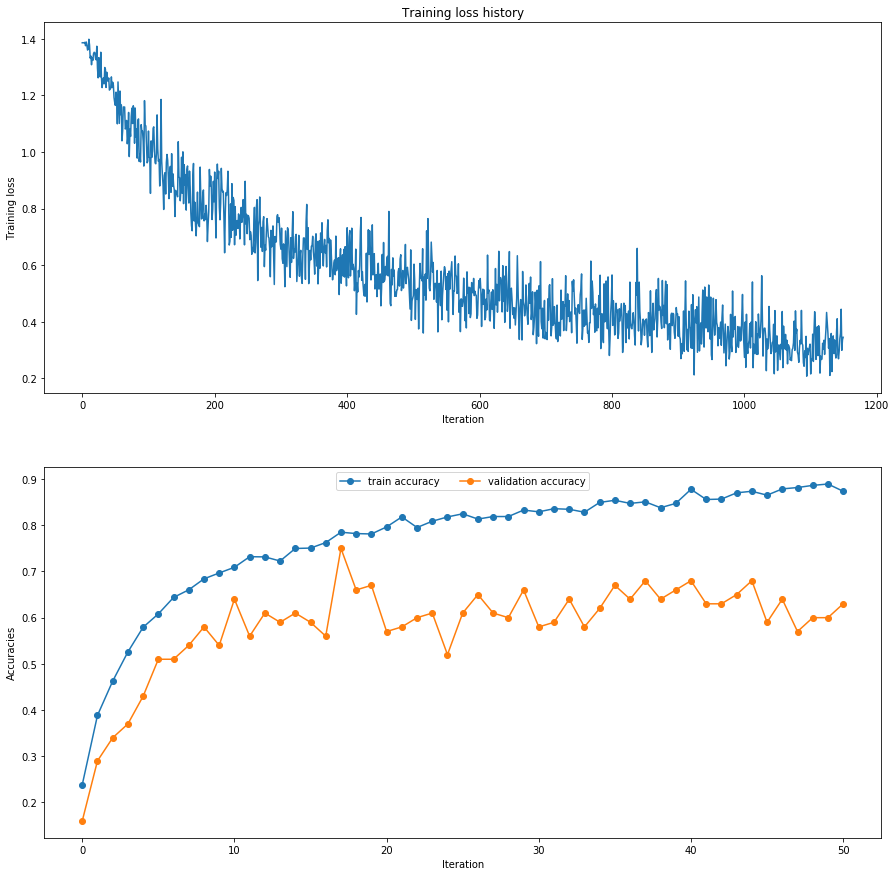

Accuracy on the validation set:  0.75
parameters of the best model:
{'filter_num': 10, 'filter_size': 4, 'pool_size': 2, 'batch_size': 200, 'lr': 0.0001}


In [6]:
# Plot the loss function and train / validation accuracies of the best model
plt.subplot(2,1,1)
plt.plot(best_solver.loss_history)
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')

plt.subplot(2,1,2)
plt.plot(best_solver.train_acc_history, '-o', label='train accuracy')
plt.plot(best_solver.val_acc_history, '-o', label='validation accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracies')
plt.legend(loc='upper center', ncol=4)

plt.gcf().set_size_inches(15, 15)
plt.show()

print('Accuracy on the validation set: ', best_val_acc)
print('parameters of the best model:')
print(best_params)

In [7]:
# test set
y_test_pred = model(X_test)
  
_, y_pred = torch.max(y_test_pred,1)
test_accu = np.mean(y_pred.data.numpy() ==  y_test.data.numpy())
print('Test accuracy', test_accu, '\n')   

Test accuracy 0.44 

